#  Global Fortune Companies By Market Cap

### Project outline

- I am going to scrape the website : https://companiesmarketcap.com

- I will get a topics like Rank of the company at present according to marketcap, name of the company ,company ticker symbol from which the company listed on stock exchange, Earning in last quater , revenue of the company ,share price at a present time,country from which particular company belong to, number of employee to respective company,category in which company and last link for each company to find more info related to company.

- For each company i'll create a CSV file in the following format:




````
__Overall_Rank  Company_Name	Company_Code	Market_Cap(Trillion/Billion(in dollar))	Share_Price (Dollar($))  
1	               Apple          APPl                          2.132000e+12                     134.06

Country_Name	Earnings(Billions(in dollar))	Company_Revenue(Billions(in dollar))	Employee_Counts	
   USA                   122.03                              394.32                          164000


__company_list                                                              Category_list
   https://companiesmarketcap.com//apple/marketcap/                             Tech
```






__When the largest Companies by different rank is opened, the list look like this:__

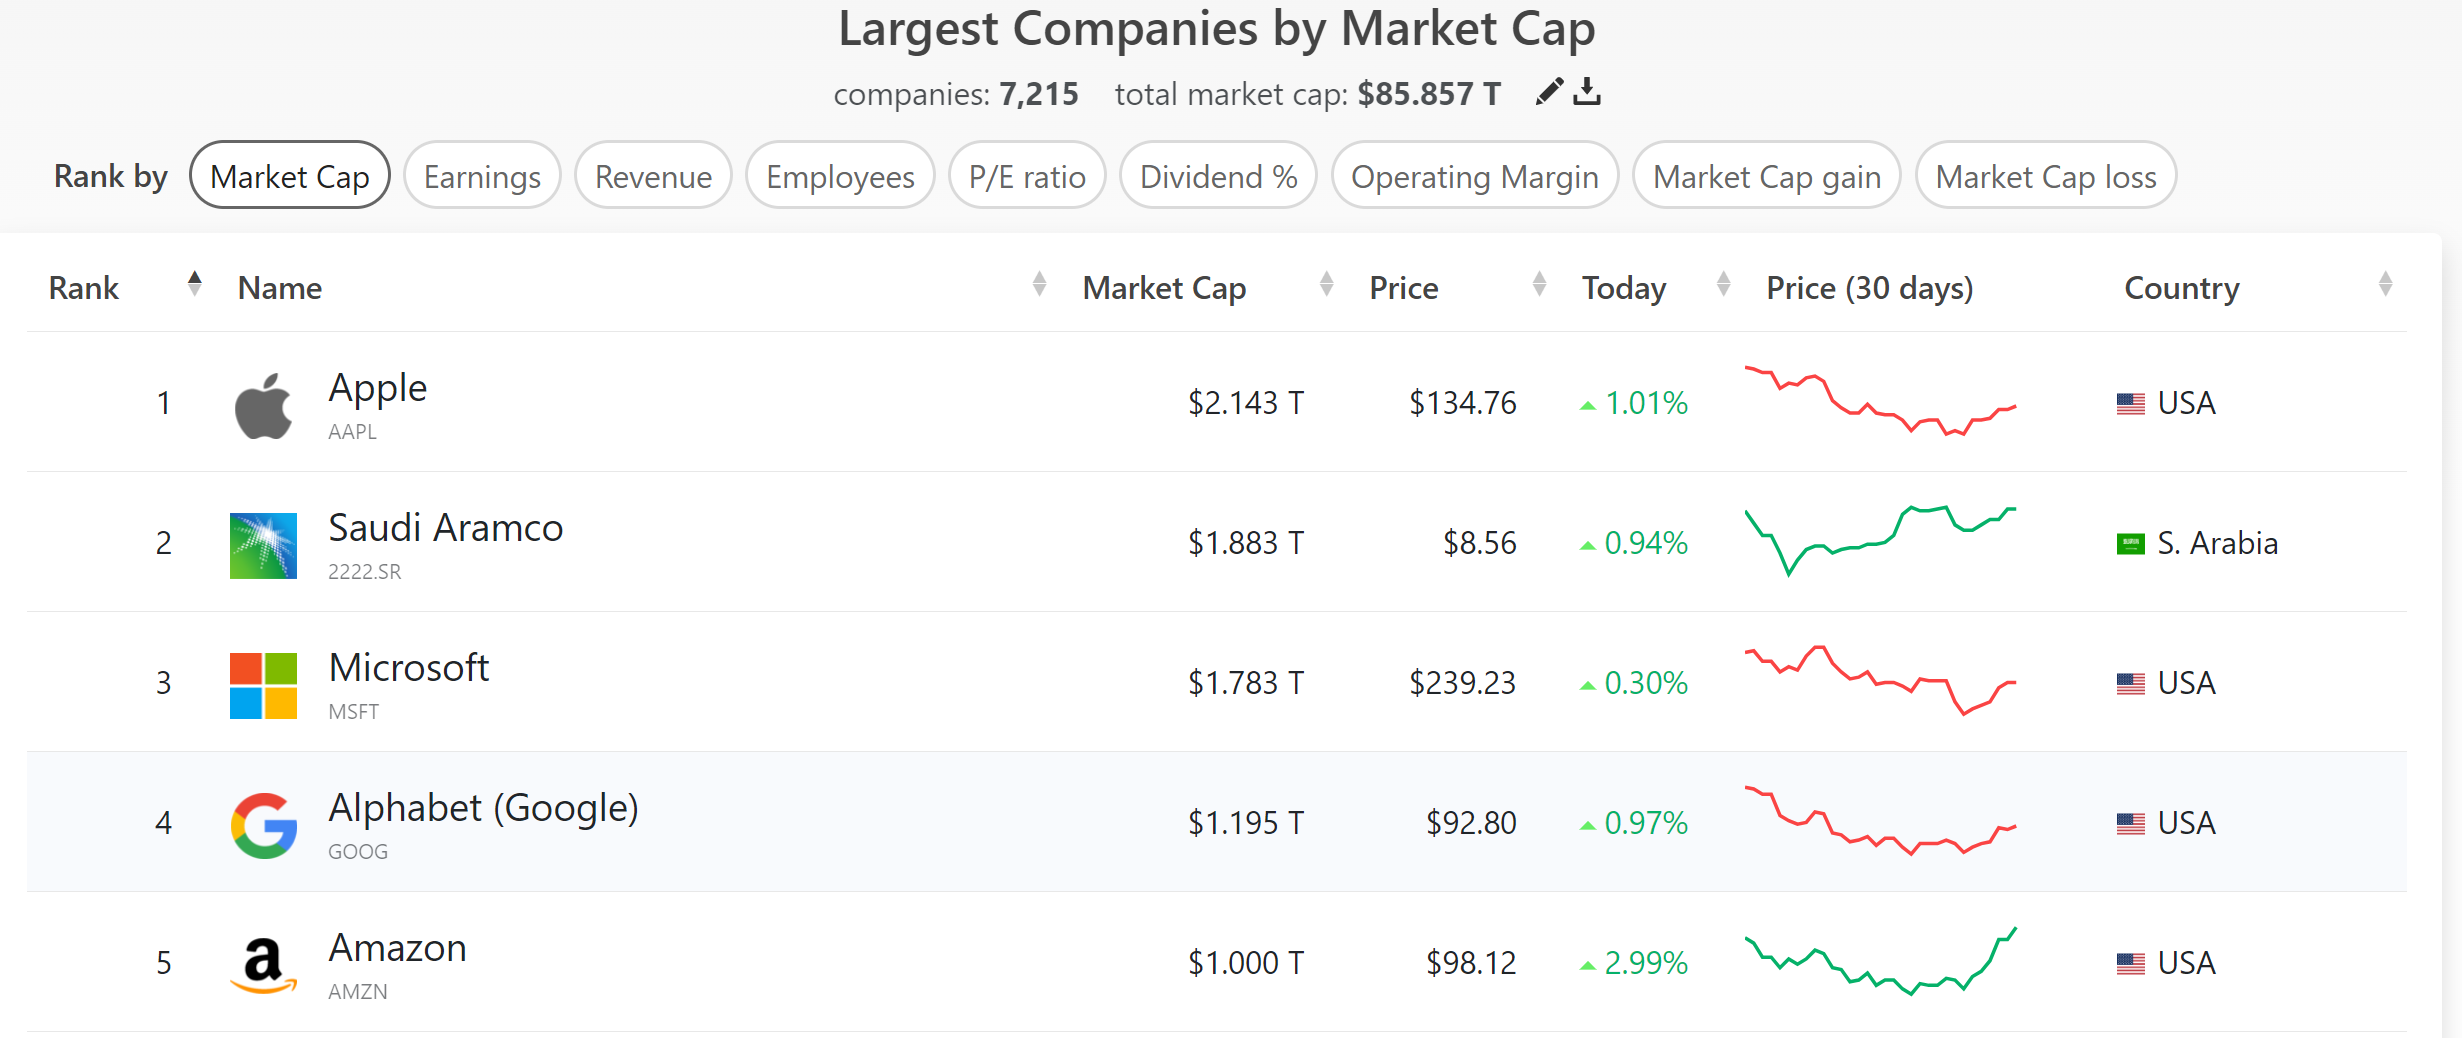

### <font color=green>Requests and BeautifulSoup
    
     What is Beautiful Soup?

>Beautiful Soup is **a Python package** for **parsing HTML and XML documents**. Beautiful Soup enables us to get data out of sequences of characters. It creates a parse tree for parsed pages that can be used to extract data from HTML. It's a handy tool when it comes to web scraping. You can read more on their documentation site. https://www.crummy.com/software/BeautifulSoup/bs4/doc/#getting-help

>To extract information from the HTML source code of a webpage programmatically, we can use the Beautiful Soup library. Let's install the library and import **the BeautifulSoup class** from **the bs4 module.**

> ### Packages Used:
> 1. Requests — For downloading the HTML code from the URL
> 2. BeautifulSoup4 — For parsing and extracting data from the HTML string
> 3. Pandas — To gather data into a dataframe for further processing

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

## Lets begin : 

## Download the webpage using `requests`


#### **requests.get()**

In order to **download a web page**, we use `requests.get()` to **send the HTTP request** to the **IMDB server** and what the function returns is a **response object**, which is **the HTTP response**. 

In [4]:
url='https://companiesmarketcap.com'
response=requests.get(url)

#### Status code

In [5]:
response.status_code

200

The HTTP response contains HTML that is ready to be displayed in browser. Here we can use `response.text` to retrive the HTML document.

In [6]:
len(response.text) #The `len` fucnction tells us the length of the response object

129265

## Parse the HTML source code using Beautiful Soup library

In [7]:
soup=BeautifulSoup(response.text,'html.parser')

In [8]:
type(soup)

bs4.BeautifulSoup

__After getting the response and creating soup time to dig deep into the html tag to find the respective outcomes for which we want to create columns for desired output.__


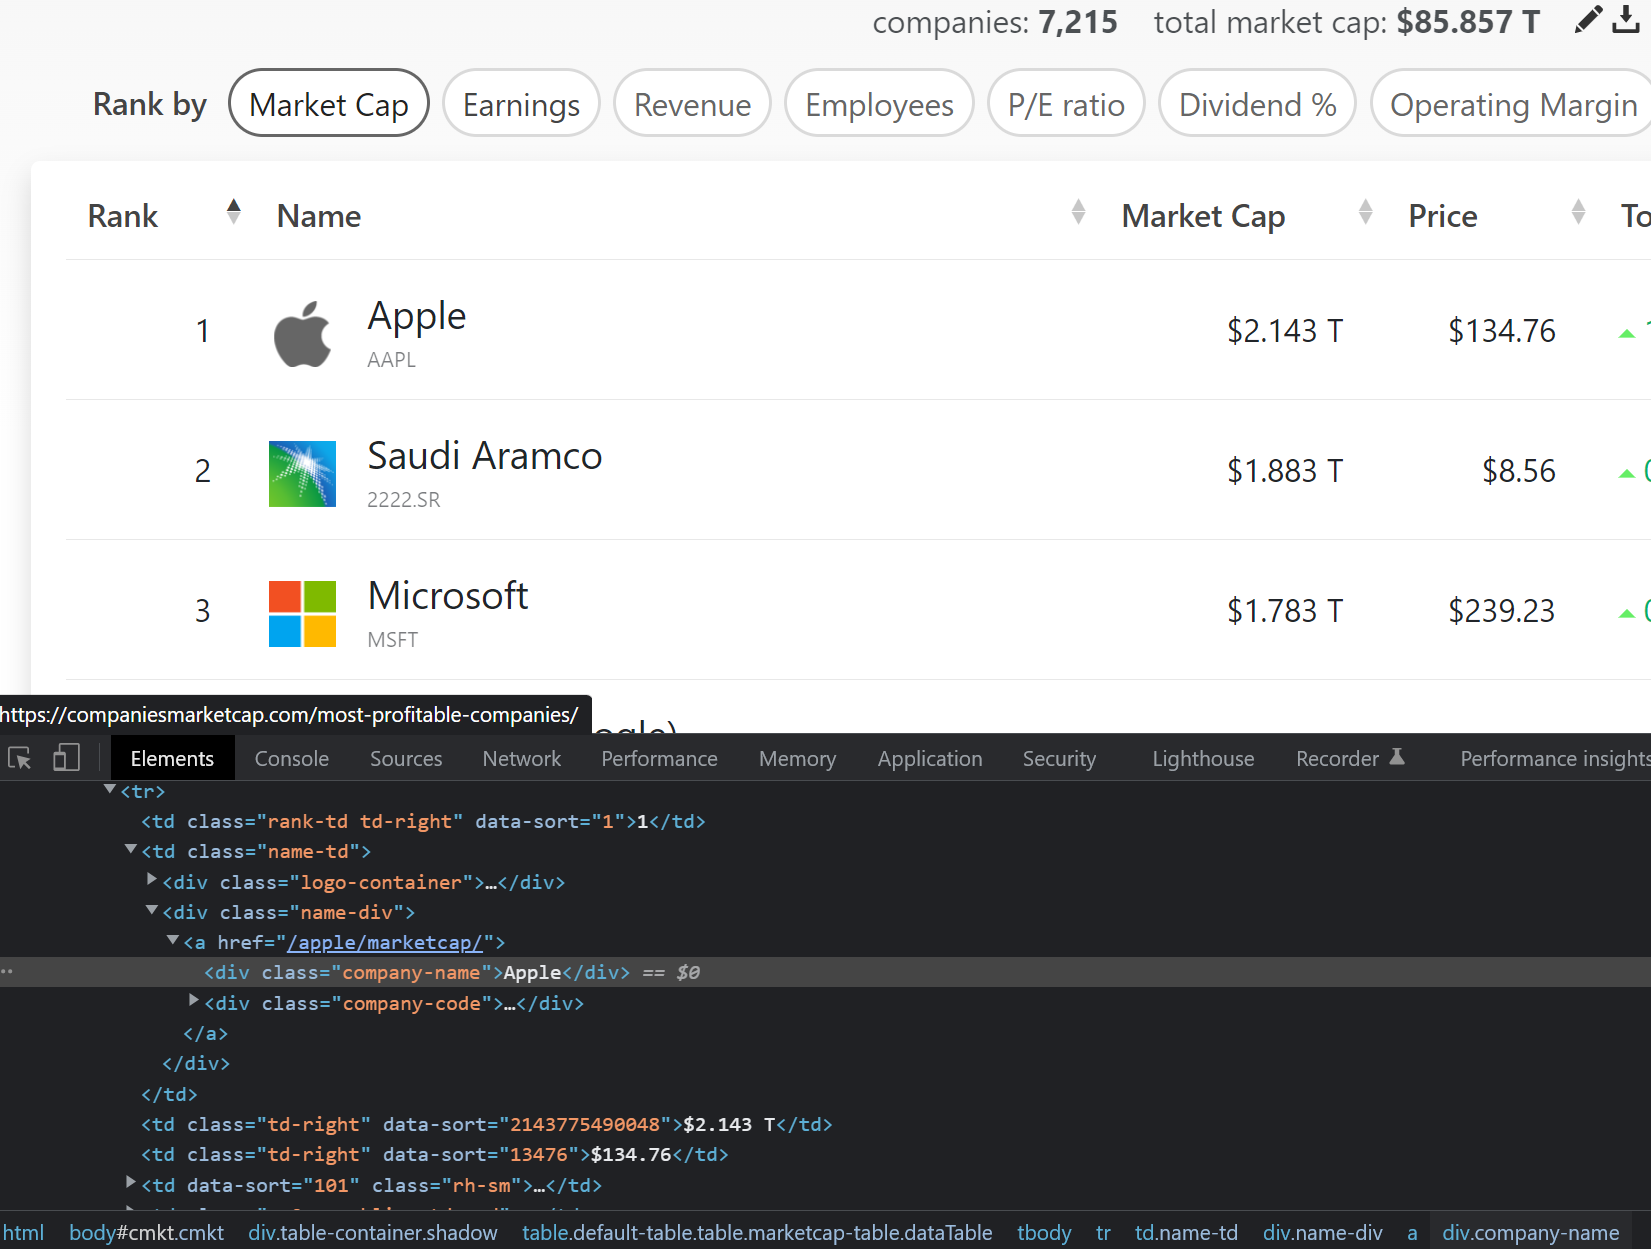

In [10]:
pages = np.arange(1,21)

Rank=[]
Company_Name=[]
Company_Code=[]
Market_Cap=[]
Share_Price=[]
Country_Code=[]
for page in pages:
    
        page = requests.get("https://companiesmarketcap.com/page/"+str(page)+"/")
        
        response.raise_for_status
        soup=BeautifulSoup(page.text,'html.parser')

        company=soup.find('tbody').find_all('tr')
        
        company_n=soup.find_all('div',class_ ="name-div")

        company_ticker=soup.find_all('div',class_ ="name-div")
        
        country=soup.find_all('span',class_='responsive-hidden')
        

        for i in company:
            
            rank=i.find_all('td')[0].text
            Rank.append(rank)
    
            market_cap =i.find_all('td')[2].text
            Market_Cap.append(market_cap)

            share_price =i.find_all('td')[3].text if i.find_all('td')[3].text else np.nan
            Share_Price.append(share_price)

            
            country_code =(i.find_all('td')[6].text.split()[0:2]) if i.find_all('td')[6].text.split()[0:2] else np.nan
            Country_Code.append(country_code)

        for name in company_n:

            Actual_Name=name.find_all('div',class_='company-name')[0].text if name.find_all('div',class_='company-name')[0] else np.nan
            Company_Name.append(Actual_Name)


        for symbol in company_ticker:
            ticker=symbol.find_all('div',class_='company-code')[0].text if symbol.find_all('div',class_='company-code')[0].text else np.nan
            Company_Code.append(ticker)
        
        

fortune_1k = pd.DataFrame({ "Overall_Rank": Rank,
                           'Company_Name': Company_Name,
                           'Company_Code': Company_Code,
                           "Market_Cap(Trillion/Billion(in dollar))": Market_Cap,
                           'Share_Price (Dollar($))': Share_Price,
                           "Country_Code": Country_Code 
                           })

In [12]:
fortune_1k.head()

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Code
0,1,Apple,AAPL,$2.143 T,$134.76,"[🇺🇸, USA]"
1,2,Saudi Aramco,2222.SR,$1.881 T,$8.55,"[🇸🇦, S.]"
2,3,Microsoft,MSFT,$1.783 T,$239.23,"[🇺🇸, USA]"
3,4,Alphabet (Google),GOOG,$1.195 T,$92.80,"[🇺🇸, USA]"
4,5,Amazon,AMZN,$1.000 T,$98.12,"[🇺🇸, USA]"


__As we see `country_code` columns are in closed brackets so, i need to clean it and present in proper format__

In [21]:
Country_Name=[]

for i in fortune_1k['Country_Code']:
    if (len(i)>1):
        Country_Name.append(i[1])
        
    else:
        Country_Name.append(np.nan)

In [23]:
fortune_1k['Country_Name']=Country_Name
Latest_F=fortune_1k.drop(['Country_Code'],axis=1)

In [24]:
Latest_F

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Name
0,1,Apple,AAPL,$2.143 T,$134.76,USA
1,2,Saudi Aramco,2222.SR,$1.881 T,$8.55,S.
2,3,Microsoft,MSFT,$1.783 T,$239.23,USA
3,4,Alphabet (Google),GOOG,$1.195 T,$92.80,USA
4,5,Amazon,AMZN,$1.000 T,$98.12,USA
...,...,...,...,...,...,...
1995,1996,Toromont,TIH.TO,$6.56 B,$79.82,Canada
1996,1997,Clean Harbors\n,CLH,$6.56 B,$121.38,USA
1997,1998,Ascendis Pharma\n,ASND,$6.55 B,$115.03,Denmark
1998,1999,TIS\n,3626.T,$6.55 B,$27.10,Japan


__For finding the Earning,revenue,employees,company link and company sector i have to jump to different pages and fetch the desired data__

In [13]:
#new='https://companiesmarketcap.com/most-profitable-companies/page/2/'
#Url='https://companiesmarketcap.com/most-profitable-companies/'


pages = np.arange(1,21)

Company_Name=[]
Company_Earnings=[]

for page in pages:
    
        page = requests.get("https://companiesmarketcap.com/most-profitable-companies/page/"+str(page)+"/")
        response.raise_for_status
        soup=BeautifulSoup(page.text,'html.parser')
        
        company=soup.find('tbody').find_all('tr')
        
        comp_name=soup.find_all('tbody')[0].find_all('div',class_='company-name')


        for i in comp_name:
            Company_Name.append(i.text.replace('\n',''))
            
            
        comp=soup.find_all('td',class_='td-right')
        
        for td in comp:
            if(td.text.strip().endswith('B')==True):
                Company_Earnings.append(td.text.strip())
            
        
Earning_df = pd.DataFrame({'Company_Name':Company_Name, 'Earnings':Company_Earnings})


In [14]:
Earning_df.head()

,Company_Name,Earnings
0,Saudi Aramco,$303.30 B
1,Apple,$122.03 B
2,Microsoft,$84.76 B
3,Alphabet (Google),$78.96 B
4,Equinor,$77.27 B


In [25]:
com_df=Latest_F.merge(Earning_df,on='Company_Name')

In [26]:
com_df

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Name,Earnings
0,1,Apple,AAPL,$2.143 T,$134.76,USA,$122.03 B
1,2,Saudi Aramco,2222.SR,$1.881 T,$8.55,S.,$303.30 B
2,3,Microsoft,MSFT,$1.783 T,$239.23,USA,$84.76 B
3,4,Alphabet (Google),GOOG,$1.195 T,$92.80,USA,$78.96 B
4,5,Amazon,AMZN,$1.000 T,$98.12,USA,$12.11 B
...,...,...,...,...,...,...,...
1038,1984,ASUS,2357.TW,$6.59 B,$8.88,Taiwan,$1.39 B
1039,1992,37 Interactive Entertainment,002555.SZ,$6.56 B,$2.96,China,$0.58 B
1040,1993,Levi Strauss,LEVI,$6.56 B,$16.54,USA,$0.70 B
1041,1994,Commercial Metals Company,CMC,$6.56 B,$56.06,USA,$1.56 B


In [15]:
pages = np.arange(1,21)

Company_Name=[]
Company_Revenue=[]

for page in pages:
    
        page = requests.get("https://companiesmarketcap.com/largest-companies-by-revenue/page/"+str(page)+"/")
        response.raise_for_status
        soup=BeautifulSoup(page.text,'html.parser')
        
        company=soup.find('tbody').find_all('tr')
        
        comp_name=soup.find_all('tbody')[0].find_all('div',class_='company-name')


        for i in comp_name:
            Company_Name.append(i.text.replace('\n',''))
            
            
        comp=soup.find_all('td',class_='td-right')
        
        for td in comp:
            if(td.text.strip().endswith('B')==True):
                Company_Revenue.append(td.text.strip())
            
        
Revenue_df = pd.DataFrame({'Company_Name':Company_Name, 'Company_Revenue':Company_Revenue})

In [16]:
Revenue_df.head()

,Company_Name,Company_Revenue
0,Walmart,$600.11 B
1,Saudi Aramco,$552.25 B
2,Amazon,$502.19 B
3,Sinopec,$480.86 B
4,PetroChina,$480.69 B


In [27]:
Comb_df=com_df.merge(Revenue_df,on='Company_Name')

In [28]:
Comb_df

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Name,Earnings,Company_Revenue
0,1,Apple,AAPL,$2.143 T,$134.76,USA,$122.03 B,$394.32 B
1,2,Saudi Aramco,2222.SR,$1.881 T,$8.55,S.,$303.30 B,$552.25 B
2,3,Microsoft,MSFT,$1.783 T,$239.23,USA,$84.76 B,$203.07 B
3,4,Alphabet (Google),GOOG,$1.195 T,$92.80,USA,$78.96 B,$282.11 B
4,5,Amazon,AMZN,$1.000 T,$98.12,USA,$12.11 B,$502.19 B
...,...,...,...,...,...,...,...,...
875,1983,Nippon Sanso,4091.T,$6.60 B,$15.27,Japan,$0.74 B,$8.38 B
876,1984,ASUS,2357.TW,$6.59 B,$8.88,Taiwan,$1.39 B,$19.20 B
877,1993,Levi Strauss,LEVI,$6.56 B,$16.54,USA,$0.70 B,$6.26 B
878,1994,Commercial Metals Company,CMC,$6.56 B,$56.06,USA,$1.56 B,$8.91 B


In [17]:
#new='https://companiesmarketcap.com/largest-companies-by-number-of-employees/page/2/'

pages = np.arange(1,21)

Company_Name=[]
Employee_Counts = []

for page in pages:
    
        page = requests.get("https://companiesmarketcap.com/largest-companies-by-number-of-employees/page/"+str(page)+"/")
        response.raise_for_status
        soup=BeautifulSoup(page.text,'html.parser')
        
        comp_name=soup.find_all('tbody')[0].find_all('div',class_='company-name')


        for i in comp_name:
            Company_Name.append(i.text.replace('\n',''))
            
            
        table_body = soup.find('tbody')
        rows = table_body.find_all('tr')

        for row in rows:
            cols = row.find_all('td',class_='td-right')
            cols = [ele.text.strip() for ele in cols]
            Employee_Counts.append(cols[1])
        
Employee_df = pd.DataFrame({'Company_Name':Company_Name, 'Employee_Counts':Employee_Counts})

In [18]:
Employee_df.head()

,Company_Name,Employee_Counts
0,Walmart,"2,300,000"
1,Amazon,"1,544,000"
2,Foxconn (Hon Hai Precision Industry),"826,608"
3,Accenture,"738,000"
4,Volkswagen,"641,900"


In [29]:
Wcomb_df=Comb_df.merge(Employee_df,on='Company_Name')

In [30]:
Wcomb_df

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Name,Earnings,Company_Revenue,Employee_Counts
0,1,Apple,AAPL,$2.143 T,$134.76,USA,$122.03 B,$394.32 B,"164,000"
1,2,Saudi Aramco,2222.SR,$1.881 T,$8.55,S.,$303.30 B,$552.25 B,"70,000"
2,3,Microsoft,MSFT,$1.783 T,$239.23,USA,$84.76 B,$203.07 B,"221,000"
3,4,Alphabet (Google),GOOG,$1.195 T,$92.80,USA,$78.96 B,$282.11 B,"186,779"
4,5,Amazon,AMZN,$1.000 T,$98.12,USA,$12.11 B,$502.19 B,"1,544,000"
...,...,...,...,...,...,...,...,...,...
725,1976,UPL,UPL.NS,$6.64 B,$8.85,India,$0.72 B,$6.48 B,"13,054"
726,1983,Nippon Sanso,4091.T,$6.60 B,$15.27,Japan,$0.74 B,$8.38 B,"19,398"
727,1993,Levi Strauss,LEVI,$6.56 B,$16.54,USA,$0.70 B,$6.26 B,"16,600"
728,1994,Commercial Metals Company,CMC,$6.56 B,$56.06,USA,$1.56 B,$8.91 B,"12,483"


In [19]:

pages = np.arange(1,21)
Company_Name=[]
company_list=[]
category_list = []
for page in pages:
    
        page = requests.get("https://companiesmarketcap.com/page/"+str(page)+"/")  
        #response.raise_for_status
        soup=BeautifulSoup(page.text,'html.parser')
        
        comp_name=soup.find_all('tbody')[0].find_all('div',class_='company-name')


        for i in comp_name:
            Company_Name.append(i.text.replace('\n',''))


        base_url='https://companiesmarketcap.com/'
        div_name=soup.find_all('td',class_='name-td')
        for i in div_name:
            a_tag = i.find('a')
            c_url=(base_url+a_tag['href'])
            company_list.append(c_url)


            company_page = requests.get(c_url)
            company_soup = BeautifulSoup(company_page.content, 'html.parser')

            div_tag=company_soup.find_all('div',class_='info-box categories-box')
            for a in div_tag:
                b=a.find('a',class_='badge badge-light category-badge').text if a.find('a',class_='badge badge-light category-badge').text else np.nan
                category_list.append(b.replace('\u200d',''))
 

a={'Company_Name':Company_Name,'category_list': category_list,'company_list':company_list}

Sector_df=pd.DataFrame.from_dict(a,orient='index')
Sector_df.transpose()

,Company_Name,category_list,company_list
0,Apple,👩💻 Tech,https://companiesmarketcap.com//apple/marketcap/
1,Saudi Aramco,⚡ Energy,https://companiesmarketcap.com//saudi-aramco/m...
2,Microsoft,\n👨💻 Software,https://companiesmarketcap.com//microsoft/mark...
3,Alphabet (Google),🖥️ Internet,https://companiesmarketcap.com//alphabet-googl...
4,Amazon,🛒 E-Commerce,https://companiesmarketcap.com//amazon/marketcap/
...,...,...,...
1995,Ingredion,None,https://companiesmarketcap.com//ingredion/mark...
1996,Toromont,None,https://companiesmarketcap.com//toromont/marke...
1997,Clean Harbors,None,https://companiesmarketcap.com//clean-harbors/...
1998,Ascendis Pharma,None,https://companiesmarketcap.com//ascendis-pharm...


In [31]:
fin=Sector_df.T

In [32]:
fin

,Company_Name,category_list,company_list
0,Apple,👩💻 Tech,https://companiesmarketcap.com//apple/marketcap/
1,Saudi Aramco,⚡ Energy,https://companiesmarketcap.com//saudi-aramco/m...
2,Microsoft,\n👨💻 Software,https://companiesmarketcap.com//microsoft/mark...
3,Alphabet (Google),🖥️ Internet,https://companiesmarketcap.com//alphabet-googl...
4,Amazon,🛒 E-Commerce,https://companiesmarketcap.com//amazon/marketcap/
...,...,...,...
1995,Ingredion,None,https://companiesmarketcap.com//ingredion/mark...
1996,Toromont,None,https://companiesmarketcap.com//toromont/marke...
1997,Clean Harbors,None,https://companiesmarketcap.com//clean-harbors/...
1998,Ascendis Pharma,None,https://companiesmarketcap.com//ascendis-pharm...


In [34]:
Final_d=Wcomb_df.merge(fin,on='Company_Name')

In [35]:
Final_d

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Name,Earnings,Company_Revenue,Employee_Counts,category_list,company_list
0,1,Apple,AAPL,$2.143 T,$134.76,USA,$122.03 B,$394.32 B,"164,000",👩💻 Tech,https://companiesmarketcap.com//apple/marketcap/
1,2,Saudi Aramco,2222.SR,$1.881 T,$8.55,S.,$303.30 B,$552.25 B,"70,000",⚡ Energy,https://companiesmarketcap.com//saudi-aramco/m...
2,3,Microsoft,MSFT,$1.783 T,$239.23,USA,$84.76 B,$203.07 B,"221,000",\n👨💻 Software,https://companiesmarketcap.com//microsoft/mark...
3,4,Alphabet (Google),GOOG,$1.195 T,$92.80,USA,$78.96 B,$282.11 B,"186,779",🖥️ Internet,https://companiesmarketcap.com//alphabet-googl...
4,5,Amazon,AMZN,$1.000 T,$98.12,USA,$12.11 B,$502.19 B,"1,544,000",🛒 E-Commerce,https://companiesmarketcap.com//amazon/marketcap/
...,...,...,...,...,...,...,...,...,...,...,...
725,1976,UPL,UPL.NS,$6.64 B,$8.85,India,$0.72 B,$6.48 B,"13,054",None,https://companiesmarketcap.com//upl/marketcap/
726,1983,Nippon Sanso,4091.T,$6.60 B,$15.27,Japan,$0.74 B,$8.38 B,"19,398",None,https://companiesmarketcap.com//nippon-sanso/m...
727,1993,Levi Strauss,LEVI,$6.56 B,$16.54,USA,$0.70 B,$6.26 B,"16,600",None,https://companiesmarketcap.com//levi-strauss/m...
728,1994,Commercial Metals Company,CMC,$6.56 B,$56.06,USA,$1.56 B,$8.91 B,"12,483",None,https://companiesmarketcap.com//commercial-met...


### <font color=green> Merging all the scraped data into a single file:
    
    
    And the file shown in my directory:
    

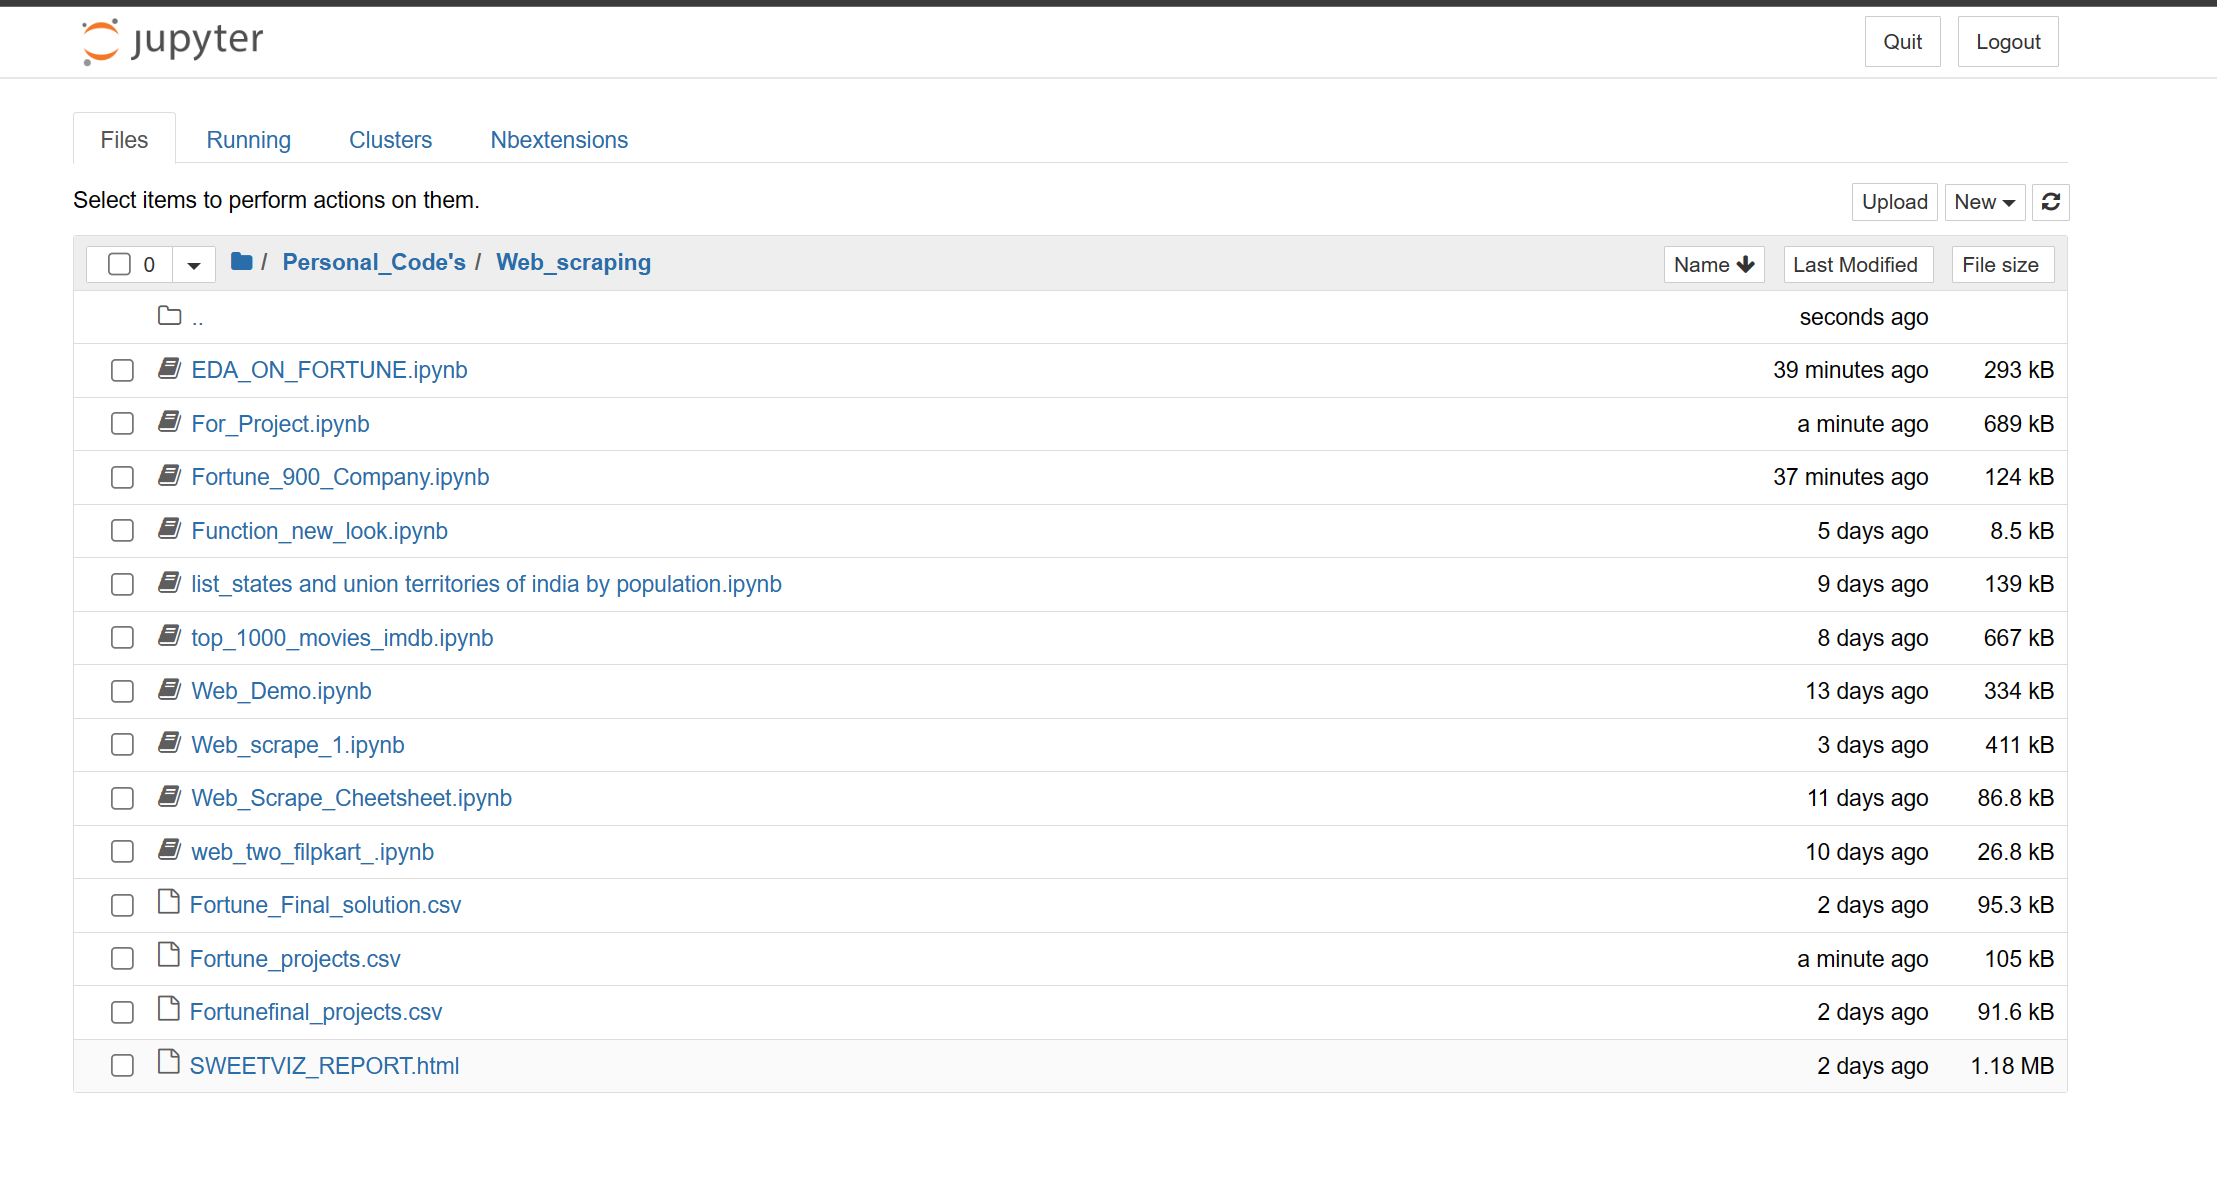

In [36]:
Final_d.to_csv('Fortune_projects.csv',index=None)

In [37]:
df=pd.read_csv('Fortune_projects.csv')

In [38]:
df

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Name,Earnings,Company_Revenue,Employee_Counts,category_list,company_list
0,1,Apple,AAPL,$2.143 T,$134.76,USA,$122.03 B,$394.32 B,"164,000",👩💻 Tech,https://companiesmarketcap.com//apple/marketcap/
1,2,Saudi Aramco,2222.SR,$1.881 T,$8.55,S.,$303.30 B,$552.25 B,"70,000",⚡ Energy,https://companiesmarketcap.com//saudi-aramco/m...
2,3,Microsoft,MSFT,$1.783 T,$239.23,USA,$84.76 B,$203.07 B,"221,000",\n👨💻 Software,https://companiesmarketcap.com//microsoft/mark...
3,4,Alphabet (Google),GOOG,$1.195 T,$92.80,USA,$78.96 B,$282.11 B,"186,779",🖥️ Internet,https://companiesmarketcap.com//alphabet-googl...
4,5,Amazon,AMZN,$1.000 T,$98.12,USA,$12.11 B,$502.19 B,"1,544,000",🛒 E-Commerce,https://companiesmarketcap.com//amazon/marketcap/
...,...,...,...,...,...,...,...,...,...,...,...
725,1976,UPL,UPL.NS,$6.64 B,$8.85,India,$0.72 B,$6.48 B,"13,054",NaN,https://companiesmarketcap.com//upl/marketcap/
726,1983,Nippon Sanso,4091.T,$6.60 B,$15.27,Japan,$0.74 B,$8.38 B,"19,398",NaN,https://companiesmarketcap.com//nippon-sanso/m...
727,1993,Levi Strauss,LEVI,$6.56 B,$16.54,USA,$0.70 B,$6.26 B,"16,600",NaN,https://companiesmarketcap.com//levi-strauss/m...
728,1994,Commercial Metals Company,CMC,$6.56 B,$56.06,USA,$1.56 B,$8.91 B,"12,483",NaN,https://companiesmarketcap.com//commercial-met...


### This is exactly what our desired output was when i began this project.

__Now we collect the data and we have to do the next step in our data science lifecycle__

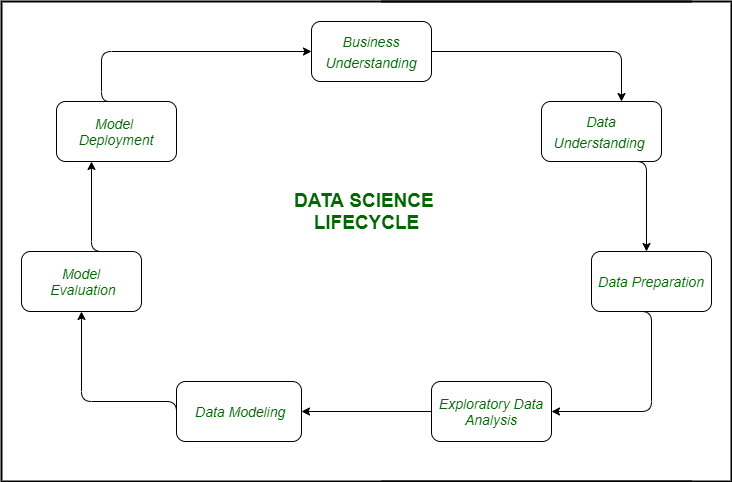

####  What is Exploratory Data Analysis?

**Exploratory Data Analysis** 

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

## <font color=green> Perform data Preprocessing & cleaning

This is one of the most Important stage in the Data Science, real world data could be `Incomplete`, `Noisy` or `Inconsistent` and this could affect negatively in the further steps. 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Overall_Rank                             730 non-null    int64 
 1   Company_Name                             730 non-null    object
 2   Company_Code                             730 non-null    object
 3   Market_Cap(Trillion/Billion(in dollar))  730 non-null    object
 4   Share_Price (Dollar($))                  730 non-null    object
 5   Country_Name                             730 non-null    object
 6   Earnings                                 730 non-null    object
 7   Company_Revenue                          730 non-null    object
 8   Employee_Counts                          730 non-null    object
 9   category_list                            684 non-null    object
 10  company_list                             730 non-null    objec

### Data Cleaning and Transform the DataType:

By default, Pandas uses large data types like int64 and float64 for numerical data and `object` for datetime. Depending on the situation we can use the smaller data types like int32, float32, int16 to save the memory. Also we should pars the date field to date time data type.

In my dataset Apart from `Rank` column all other are objects which means to be a string type, so we have to convert them into `float or int`.

### For every company emloyee counts must be in integers:

In [49]:
df['Employee_Counts']=((df['Employee_Counts']).str.replace(',',''))
df['Employee_Counts']=pd.to_numeric(df['Employee_Counts'],errors='coerce')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Overall_Rank                             730 non-null    int64 
 1   Company_Name                             730 non-null    object
 2   Company_Code                             730 non-null    object
 3   Market_Cap(Trillion/Billion(in dollar))  730 non-null    object
 4   Share_Price (Dollar($))                  730 non-null    object
 5   Country_Name                             730 non-null    object
 6   Earnings                                 730 non-null    object
 7   Company_Revenue                          730 non-null    object
 8   Employee_Counts                          730 non-null    int64 
 9   category_list                            684 non-null    object
 10  company_list                             730 non-null    objec

### Earning must be in `float`

In [51]:
df['Earnings']=df['Earnings'].str.replace('$','')
df['Earnings']=df['Earnings'].str.replace('B','')
df['Earnings']=pd.to_numeric(df['Earnings'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Overall_Rank                             730 non-null    int64  
 1   Company_Name                             730 non-null    object 
 2   Company_Code                             730 non-null    object 
 3   Market_Cap(Trillion/Billion(in dollar))  730 non-null    object 
 4   Share_Price (Dollar($))                  730 non-null    object 
 5   Country_Name                             730 non-null    object 
 6   Earnings                                 730 non-null    float64
 7   Company_Revenue                          730 non-null    object 
 8   Employee_Counts                          730 non-null    int64  
 9   category_list                            684 non-null    object 
 10  company_list                             730 non-n

C:\Users\ABHISHEK RAJ\AppData\Local\Temp\ipykernel_17772\1446616121.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Earnings']=df['Earnings'].str.replace('$','')


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Overall_Rank                             730 non-null    int64  
 1   Company_Name                             730 non-null    object 
 2   Company_Code                             730 non-null    object 
 3   Market_Cap(Trillion/Billion(in dollar))  730 non-null    object 
 4   Share_Price (Dollar($))                  730 non-null    object 
 5   Country_Name                             730 non-null    object 
 6   Earnings(Billions(in dollar))            730 non-null    float64
 7   Company_Revenue(Billions(in dollar))     730 non-null    float64
 8   Employee_Counts                          730 non-null    int64  
 9   category_list                            684 non-null    object 
 10  company_list                             730 non-n

### Share Price Also in `float`

In [59]:
df['Share_Price (Dollar($))']=df['Share_Price (Dollar($))'].str.replace('$','')
df['Share_Price (Dollar($))']=pd.to_numeric(df['Share_Price (Dollar($))'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Overall_Rank                             730 non-null    int64  
 1   Company_Name                             730 non-null    object 
 2   Company_Code                             730 non-null    object 
 3   Market_Cap(Trillion/Billion(in dollar))  730 non-null    object 
 4   Share_Price (Dollar($))                  722 non-null    float64
 5   Country_Name                             730 non-null    object 
 6   Earnings(Billions(in dollar))            730 non-null    float64
 7   Company_Revenue(Billions(in dollar))     730 non-null    float64
 8   Employee_Counts                          730 non-null    int64  
 9   category_list                            684 non-null    object 
 10  company_list                             730 non-n

C:\Users\ABHISHEK RAJ\AppData\Local\Temp\ipykernel_17772\1614325071.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Share_Price (Dollar($))']=df['Share_Price (Dollar($))'].str.replace('$','')


In [60]:
df['Market_Cap(Trillion/Billion(in dollar))']=df['Market_Cap(Trillion/Billion(in dollar))'].str.replace('$','').str.replace('T','').str.replace('B','')
df['Market_Cap(Trillion/Billion(in dollar))']=pd.to_numeric(df['Market_Cap(Trillion/Billion(in dollar))'],errors='coerce')

C:\Users\ABHISHEK RAJ\AppData\Local\Temp\ipykernel_17772\970837122.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Market_Cap(Trillion/Billion(in dollar))']=df['Market_Cap(Trillion/Billion(in dollar))'].str.replace('$','').str.replace('T','').str.replace('B','')


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Overall_Rank                             730 non-null    int64  
 1   Company_Name                             730 non-null    object 
 2   Company_Code                             730 non-null    object 
 3   Market_Cap(Trillion/Billion(in dollar))  730 non-null    float64
 4   Share_Price (Dollar($))                  722 non-null    float64
 5   Country_Name                             730 non-null    object 
 6   Earnings(Billions(in dollar))            730 non-null    float64
 7   Company_Revenue(Billions(in dollar))     730 non-null    float64
 8   Employee_Counts                          730 non-null    int64  
 9   category_list                            684 non-null    object 
 10  company_list                             730 non-n

In [62]:
df.describe()

,Overall_Rank,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Earnings(Billions(in dollar)),Company_Revenue(Billions(in dollar)),Employee_Counts
count,730.000000,730.000000,722.000000,730.000000,730.000000,7.300000e+02
mean,667.508219,60.238962,97.830152,6.463260,40.843082,8.431190e+04
std,541.665795,77.103680,129.136084,15.207177,65.153752,1.417136e+05
min,1.000000,1.000000,0.360000,0.510000,4.050000,8.675000e+03
25%,212.250000,16.050000,17.352500,1.402500,9.557500,1.917125e+04
50%,536.000000,32.400000,50.935000,2.750000,18.650000,4.192600e+04
75%,1019.500000,66.135000,125.327500,6.275000,42.925000,9.463375e+04
max,1995.000000,472.350000,852.850000,303.300000,600.110000,2.300000e+06


### After Seen the describe function  the mean and median value is contradicting to each others so, we have to do that in a proper formate:

Because some of The company market cap values are in Trillion and rest are them in billion's so we have to make them in proper numeric values:

In [63]:
df['Market_Cap(Trillion/Billion(in dollar))'][0:4]=(df['Market_Cap(Trillion/Billion(in dollar))'][0:4]*pow(10,12))
df['Market_Cap(Trillion/Billion(in dollar))'][4:]=(df['Market_Cap(Trillion/Billion(in dollar))'][4:]*pow(10,9))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Overall_Rank                             730 non-null    int64  
 1   Company_Name                             730 non-null    object 
 2   Company_Code                             730 non-null    object 
 3   Market_Cap(Trillion/Billion(in dollar))  730 non-null    float64
 4   Share_Price (Dollar($))                  722 non-null    float64
 5   Country_Name                             730 non-null    object 
 6   Earnings(Billions(in dollar))            730 non-null    float64
 7   Company_Revenue(Billions(in dollar))     730 non-null    float64
 8   Employee_Counts                          730 non-null    int64  
 9   category_list                            684 non-null    object 
 10  company_list                             730 non-n

C:\Users\ABHISHEK RAJ\AppData\Local\Temp\ipykernel_17772\2756407146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Market_Cap(Trillion/Billion(in dollar))'][0:4]=(df['Market_Cap(Trillion/Billion(in dollar))'][0:4]*pow(10,12))
C:\Users\ABHISHEK RAJ\AppData\Local\Temp\ipykernel_17772\2756407146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Market_Cap(Trillion/Billion(in dollar))'][4:]=(df['Market_Cap(Trillion/Billion(in dollar))'][4:]*pow(10,9))


In [96]:
df.head()

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Name,Earnings(Billions(in dollar)),Company_Revenue(Billions(in dollar)),Employee_Counts,company_list,Category_list
0,1,Apple,AAPL,2.132000e+12,134.06,USA,122.03,394.32,164000,https://companiesmarketcap.com//apple/marketcap/,Tech
1,2,Saudi Aramco,2222.SR,1.883000e+12,8.56,S.Arabia,303.30,552.25,70000,https://companiesmarketcap.com//saudi-aramco/m...,Energy
2,3,Microsoft,MSFT,1.787000e+12,239.73,USA,84.76,203.07,221000,https://companiesmarketcap.com//microsoft/mark...,Software
3,4,Alphabet (Google),GOOG,1.190000e+12,92.30,USA,78.96,282.11,186779,https://companiesmarketcap.com//alphabet-googl...,Internet
4,5,Amazon,AMZN,9.757900e+11,95.65,USA,12.11,502.19,1544000,https://companiesmarketcap.com//amazon/marketcap/,E-Commerce


In [77]:
df.isnull().sum()

Overall_Rank                               0
Company_Name                               0
Company_Code                               0
Market_Cap(Trillion/Billion(in dollar))    0
Share_Price (Dollar($))                    7
Country_Name                               0
Earnings(Billions(in dollar))              0
Company_Revenue(Billions(in dollar))       0
Employee_Counts                            0
company_list                               0
Category_list                              0
dtype: int64

In [79]:
df.loc[[52,141,286,340,393,449,523],'Share_Price (Dollar($))']=[1793,2301,2369,2073,3206,10537,2483]

### Now we have clear all the null values :

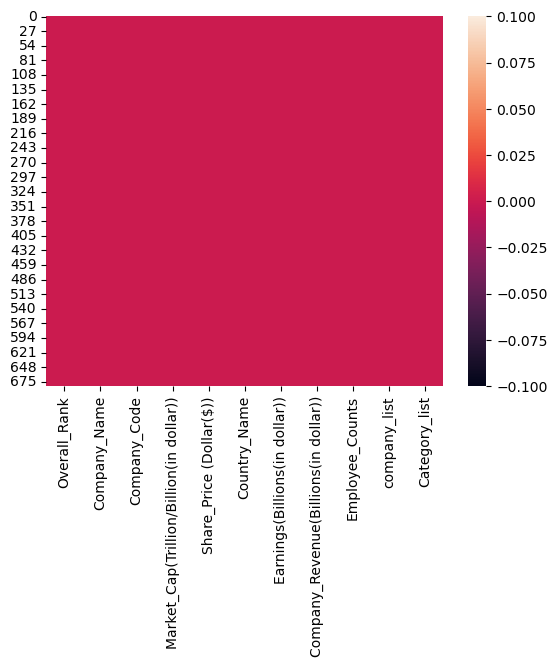

In [83]:
sns.heatmap(df.isnull());

In [38]:
df.to_csv('Fortunefinal_500.csv',index=None)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Overall_Rank                             683 non-null    int64  
 1   Company_Name                             683 non-null    object 
 2   Company_Code                             683 non-null    object 
 3   Market_Cap(Trillion/Billion(in dollar))  683 non-null    float64
 4   Share_Price (Dollar($))                  683 non-null    float64
 5   Country_Name                             683 non-null    object 
 6   Earnings(Billions(in dollar))            683 non-null    float64
 7   Company_Revenue(Billions(in dollar))     683 non-null    float64
 8   Employee_Counts                          683 non-null    int64  
 9   company_list                             683 non-null    object 
 10  Category_list                            683 non-n

### Now once again we call our Dataframe and do deep analysis into it:

In [2]:
df=pd.read_csv('Fortunefinal_500.csv')

In [3]:
df.head(10)

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Name,Earnings(Billions(in dollar)),Company_Revenue(Billions(in dollar)),Employee_Counts,company_list,Category_list
0,1,Apple,AAPL,2.132000e+12,134.06,USA,122.03,394.32,164000,https://companiesmarketcap.com//apple/marketcap/,Tech
1,2,Saudi Aramco,2222.SR,1.883000e+12,8.56,S.Arabia,303.30,552.25,70000,https://companiesmarketcap.com//saudi-aramco/m...,Energy
2,3,Microsoft,MSFT,1.787000e+12,239.73,USA,84.76,203.07,221000,https://companiesmarketcap.com//microsoft/mark...,Software
3,4,Alphabet (Google),GOOG,1.190000e+12,92.30,USA,78.96,282.11,186779,https://companiesmarketcap.com//alphabet-googl...,Internet
4,5,Amazon,AMZN,9.757900e+11,95.65,USA,12.11,502.19,1544000,https://companiesmarketcap.com//amazon/marketcap/,E-Commerce
5,7,Visa,V,4.730300e+11,223.38,USA,18.13,29.31,26500,https://companiesmarketcap.com//visa/marketcap/,Financial services
6,8,Exxon Mobil,XOM,4.668400e+11,113.36,USA,70.64,386.81,63000,https://companiesmarketcap.com//exxon-mobil/ma...,Oil&Gas
7,9,UnitedHealth,UNH,4.645300e+11,497.17,USA,25.23,313.13,350000,https://companiesmarketcap.com//united-health/...,Healthcare
8,10,TSMC,TSM,4.571200e+11,88.14,Taiwan,33.81,70.44,65152,https://companiesmarketcap.com//tsmc/marketcap/,Semiconductors
9,11,Johnson & Johnson,JNJ,4.563300e+11,174.54,USA,22.51,96.04,141700,https://companiesmarketcap.com//johnson-and-jo...,Pharmaceuticals


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Overall_Rank                             683 non-null    int64  
 1   Company_Name                             683 non-null    object 
 2   Company_Code                             683 non-null    object 
 3   Market_Cap(Trillion/Billion(in dollar))  683 non-null    float64
 4   Share_Price (Dollar($))                  683 non-null    float64
 5   Country_Name                             683 non-null    object 
 6   Earnings(Billions(in dollar))            683 non-null    float64
 7   Company_Revenue(Billions(in dollar))     683 non-null    float64
 8   Employee_Counts                          683 non-null    int64  
 9   company_list                             683 non-null    object 
 10  Category_list                            683 non-n

###### We can get the overall Statistics About our DataFrame.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall_Rank,683.0,5.841991e+02,4.559633e+02,1.000000e+00,1.965000e+02,4.830000e+02,8.645000e+02,1.687000e+03
Market_Cap(Trillion/Billion(in dollar)),683.0,7.521066e+10,1.564763e+11,8.270000e+09,1.976500e+10,3.645000e+10,7.224500e+10,2.132000e+12
Share_Price (Dollar($)),683.0,1.387021e+02,4.747714e+02,3.600000e-01,1.883500e+01,5.514000e+01,1.336700e+02,1.053700e+04
Earnings(Billions(in dollar)),683.0,6.825344e+00,1.565617e+01,5.100000e-01,1.500000e+00,2.970000e+00,6.730000e+00,3.033000e+02
Company_Revenue(Billions(in dollar)),683.0,4.282871e+01,6.682823e+01,4.090000e+00,1.023500e+01,1.977000e+01,4.614000e+01,6.001100e+02
Employee_Counts,683.0,8.734948e+04,1.453083e+05,8.675000e+03,1.960550e+04,4.473000e+04,9.678950e+04,2.300000e+06


In [6]:
df.head(10)

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Name,Earnings(Billions(in dollar)),Company_Revenue(Billions(in dollar)),Employee_Counts,company_list,Category_list
0,1,Apple,AAPL,2.132000e+12,134.06,USA,122.03,394.32,164000,https://companiesmarketcap.com//apple/marketcap/,Tech
1,2,Saudi Aramco,2222.SR,1.883000e+12,8.56,S.Arabia,303.30,552.25,70000,https://companiesmarketcap.com//saudi-aramco/m...,Energy
2,3,Microsoft,MSFT,1.787000e+12,239.73,USA,84.76,203.07,221000,https://companiesmarketcap.com//microsoft/mark...,Software
3,4,Alphabet (Google),GOOG,1.190000e+12,92.30,USA,78.96,282.11,186779,https://companiesmarketcap.com//alphabet-googl...,Internet
4,5,Amazon,AMZN,9.757900e+11,95.65,USA,12.11,502.19,1544000,https://companiesmarketcap.com//amazon/marketcap/,E-Commerce
5,7,Visa,V,4.730300e+11,223.38,USA,18.13,29.31,26500,https://companiesmarketcap.com//visa/marketcap/,Financial services
6,8,Exxon Mobil,XOM,4.668400e+11,113.36,USA,70.64,386.81,63000,https://companiesmarketcap.com//exxon-mobil/ma...,Oil&Gas
7,9,UnitedHealth,UNH,4.645300e+11,497.17,USA,25.23,313.13,350000,https://companiesmarketcap.com//united-health/...,Healthcare
8,10,TSMC,TSM,4.571200e+11,88.14,Taiwan,33.81,70.44,65152,https://companiesmarketcap.com//tsmc/marketcap/,Semiconductors
9,11,Johnson & Johnson,JNJ,4.563300e+11,174.54,USA,22.51,96.04,141700,https://companiesmarketcap.com//johnson-and-jo...,Pharmaceuticals


In [7]:
df.tail(10)

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Name,Earnings(Billions(in dollar)),Company_Revenue(Billions(in dollar)),Employee_Counts,company_list,Category_list
673,1629,China Zheshang Bank,2016.HK,8.700000e+09,0.36,China,2.35,6.56,18412,https://companiesmarketcap.com//china-zheshang...,Banks
674,1639,Penske Automotive,PAG,8.640000e+09,121.30,USA,1.88,27.09,25000,https://companiesmarketcap.com//penske-automot...,Automotive Suppliers
675,1643,Williams-Sonoma,WSM,8.610000e+09,129.45,USA,1.55,8.72,12200,https://companiesmarketcap.com//williams-sonom...,Home & Kitchen Appliances
676,1656,Traton,8TRA.DE,8.460000e+09,16.93,Germany,1.04,39.91,99865,https://companiesmarketcap.com//traton/marketcap/,Specialty Vehicles
677,1661,Whirlpool,WHR,8.430000e+09,154.91,USA,0.93,20.61,69000,https://companiesmarketcap.com//whirlpool/mark...,Home & Kitchen Appliances
678,1665,Covestro,1COV.F,8.420000e+09,43.62,Germany,1.41,19.59,17909,https://companiesmarketcap.com//covestro/marke...,Chemicals
679,1675,Banco Santander México,BSMX,8.360000e+09,6.17,Mexico,1.62,4.57,25627,https://companiesmarketcap.com//banco-santande...,Banks
680,1676,Dentsu,4324.T,8.350000e+09,31.57,Japan,1.18,9.31,64832,https://companiesmarketcap.com//dentsu/marketcap/,Advertising
681,1678,Jones Lang LaSalle,JLL,8.330000e+09,175.53,USA,1.30,21.20,98200,https://companiesmarketcap.com//jll/marketcap/,Real estate
682,1687,Robert Half,RHI,8.270000e+09,76.26,USA,0.91,7.28,14600,https://companiesmarketcap.com//robert-half/ma...,Professional Services


##### Check for Duplicate Data and Drop them If any:

In [8]:
df.duplicated().any()

False

There are no any duplicated values in our DataFrame.

### Top Countries According to Market_Cap:

In [9]:
df['Market_Cap(Trillion/Billion(in dollar))']

0      2.132000e+12
1      1.883000e+12
2      1.787000e+12
3      1.190000e+12
4      9.757900e+11
           ...     
678    8.420000e+09
679    8.360000e+09
680    8.350000e+09
681    8.330000e+09
682    8.270000e+09
Name: Market_Cap(Trillion/Billion(in dollar)), Length: 683, dtype: float64

In [10]:
df.sort_values(by=['Market_Cap(Trillion/Billion(in dollar))','Company_Name'],ascending=False).head(10)

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Name,Earnings(Billions(in dollar)),Company_Revenue(Billions(in dollar)),Employee_Counts,company_list,Category_list
0,1,Apple,AAPL,2.132000e+12,134.06,USA,122.03,394.32,164000,https://companiesmarketcap.com//apple/marketcap/,Tech
1,2,Saudi Aramco,2222.SR,1.883000e+12,8.56,S.Arabia,303.30,552.25,70000,https://companiesmarketcap.com//saudi-aramco/m...,Energy
2,3,Microsoft,MSFT,1.787000e+12,239.73,USA,84.76,203.07,221000,https://companiesmarketcap.com//microsoft/mark...,Software
3,4,Alphabet (Google),GOOG,1.190000e+12,92.30,USA,78.96,282.11,186779,https://companiesmarketcap.com//alphabet-googl...,Internet
4,5,Amazon,AMZN,9.757900e+11,95.65,USA,12.11,502.19,1544000,https://companiesmarketcap.com//amazon/marketcap/,E-Commerce
5,7,Visa,V,4.730300e+11,223.38,USA,18.13,29.31,26500,https://companiesmarketcap.com//visa/marketcap/,Financial services
6,8,Exxon Mobil,XOM,4.668400e+11,113.36,USA,70.64,386.81,63000,https://companiesmarketcap.com//exxon-mobil/ma...,Oil&Gas
7,9,UnitedHealth,UNH,4.645300e+11,497.17,USA,25.23,313.13,350000,https://companiesmarketcap.com//united-health/...,Healthcare
8,10,TSMC,TSM,4.571200e+11,88.14,Taiwan,33.81,70.44,65152,https://companiesmarketcap.com//tsmc/marketcap/,Semiconductors
9,11,Johnson & Johnson,JNJ,4.563300e+11,174.54,USA,22.51,96.04,141700,https://companiesmarketcap.com//johnson-and-jo...,Pharmaceuticals


#### Top ten Company according to their share Price:

In [11]:
topshare_df=df.sort_values(by='Share_Price (Dollar($))',ascending=False)[['Company_Name','Share_Price (Dollar($))','Overall_Rank']].head(10)

In [12]:
topshare_df

,Company_Name,Share_Price (Dollar($)),Overall_Rank
449,Lindt,10537.00,711
393,Givaudan,3206.00,594
523,SGS,2483.00,907
286,AutoZone,2369.00,375
141,Booking Holdings (Booking.com),2301.00,158
340,Maersk,2073.00,481
52,Hermès,1793.00,56
304,Chipotle Mexican Grill,1525.00,410
11,LVMH,831.31,13
71,Dior,819.28,77


#### Top 10 company according to workforce:

In [13]:
topEmp_df=df.sort_values(by='Employee_Counts',ascending=False)[['Company_Name','Employee_Counts','Overall_Rank']].head(10)

In [14]:
topEmp_df

,Company_Name,Employee_Counts,Overall_Rank
14,Walmart,2300000,16
4,Amazon,1544000,5
285,Foxconn (Hon Hai Precision Industry),826608,373
53,Accenture,738000,57
155,Volkswagen,641900,176
73,Tata Consultancy Services,616171,80
258,Deutsche Post,583816,324
365,Kroger,500000,536
63,United Parcel Service,500000,69
23,Home Depot,500000,25


### Earnings vs. Revenue:


__Revenue is the total money a business receives, while earnings refers to the remaining money after expenses.__

__We Use revenue to determine `income`, while use earnings to determine `profit`.__

__Revenue measures how much income a company can generate, while earnings measures a business's `profits after expenses`.__

__High revenue highlights more `income and inflow for a company`, while lower revenue showcases `less income and inflow`. High earnings show strong profits or gain, while low earnings showcase poor profit or gain.__

In [15]:
df.columns

Index(['Overall_Rank', 'Company_Name', 'Company_Code',
       'Market_Cap(Trillion/Billion(in dollar))', 'Share_Price (Dollar($))',
       'Country_Name', 'Earnings(Billions(in dollar))',
       'Company_Revenue(Billions(in dollar))', 'Employee_Counts',
       'company_list', 'Category_list'],
      dtype='object')

In [16]:
topEarn_df=df.sort_values(by='Earnings(Billions(in dollar))',ascending=False)[['Company_Name','Earnings(Billions(in dollar))','Overall_Rank']].head(10)

### Top companies and their earning:


Ans according to above definition `Saudi Aramco` is on top wrt earning.

In [17]:
topEarn_df

,Company_Name,Earnings(Billions(in dollar)),Overall_Rank
1,Saudi Aramco,303.30,2
0,Apple,122.03,1
2,Microsoft,84.76,3
3,Alphabet (Google),78.96,4
122,Equinor,77.27,139
6,Exxon Mobil,70.64,8
38,ICBC,65.01,42
39,Shell,64.64,43
60,China Construction Bank,57.15,64
176,Petrobras,53.48,203


### Top companies and their respective Revenue:

And according to Revenue `walmart` on top.

In [18]:
topRev_df=df.sort_values(by='Company_Revenue(Billions(in dollar))',ascending=False)[['Company_Name','Company_Revenue(Billions(in dollar))','Overall_Rank']].head(10)

In [19]:
topRev_df

,Company_Name,Company_Revenue(Billions(in dollar)),Overall_Rank
14,Walmart,600.11,16
1,Saudi Aramco,552.25,2
4,Amazon,502.19,5
163,Sinopec,480.86,187
88,PetroChina,480.69,98
0,Apple,394.32,1
6,Exxon Mobil,386.81,8
39,Shell,365.29,43
362,China State Construction Engineering,315.96,526
106,CVS Health,315.22,117


### Now we can find number of unique countries in our dataframe:

In [20]:
df['Country_Name'].unique()

array(['USA', 'S.Arabia', 'Taiwan', 'China', 'France', 'Switzerland',
       'Denmark', 'Netherlands', 'UK', 'India', 'Japan', 'Ireland',
       'Australia', 'Canada', 'Germany', 'Belgium', 'Norway', 'Spain',
       'South Korea', 'Brazil', 'Singapore', 'Mexico', 'Italy', 'Hong',
       'Finland', 'Sweden', 'Indonesia', 'Luxembourg', 'Colombia',
       'Malaysia', 'Portugal', 'South Africa', 'Austria', 'Bermuda',
       'Turkey'], dtype=object)

In [21]:
df['Country_Name'].nunique()

35

### Top country in our dataframe:


# <font color=green>Data analysis:


So, `USA` is on top and `china` is on 2nd and our `India` is 10th , according to our DataFrame.

In [89]:
topcountry_df=df['Country_Name'].value_counts().head(10)

In [122]:
topcountry_df

USA            272
China           64
Japan           57
Germany         36
France          31
UK              27
Switzerland     23
Canada          22
Australia       14
India           14
Name: Country_Name, dtype: int64

<AxesSubplot:title={'center':'Top country'}, xlabel='Number', ylabel='Country Name'>

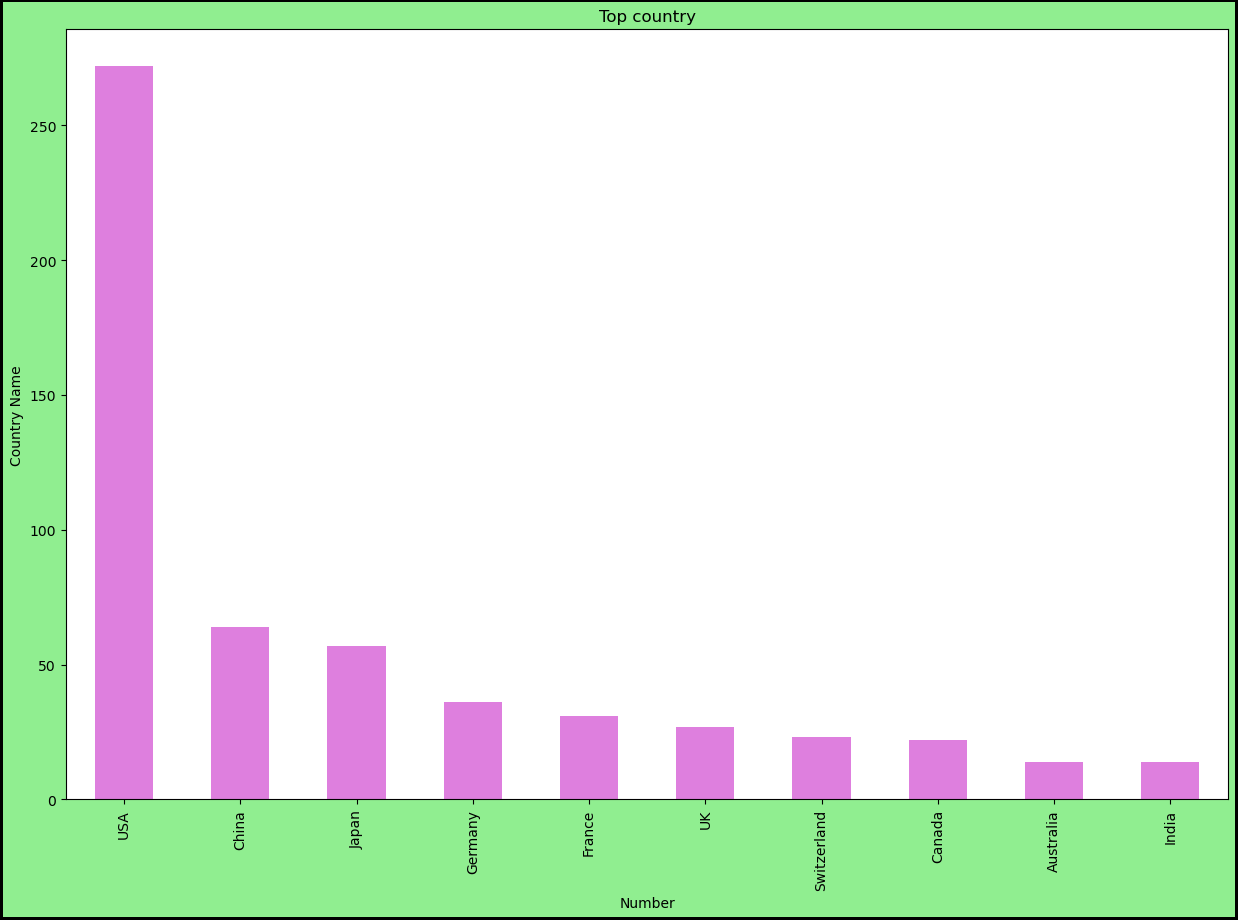

In [108]:
plt.figure(figsize=(15,10),facecolor='lightgreen',edgecolor='black',linewidth=3)
plt.xlabel('Number')
plt.ylabel('Country Name')
plt.title('Top country')
topcountry_df.plot(kind='bar',color='m',alpha=0.5)

#### Top 10 country 

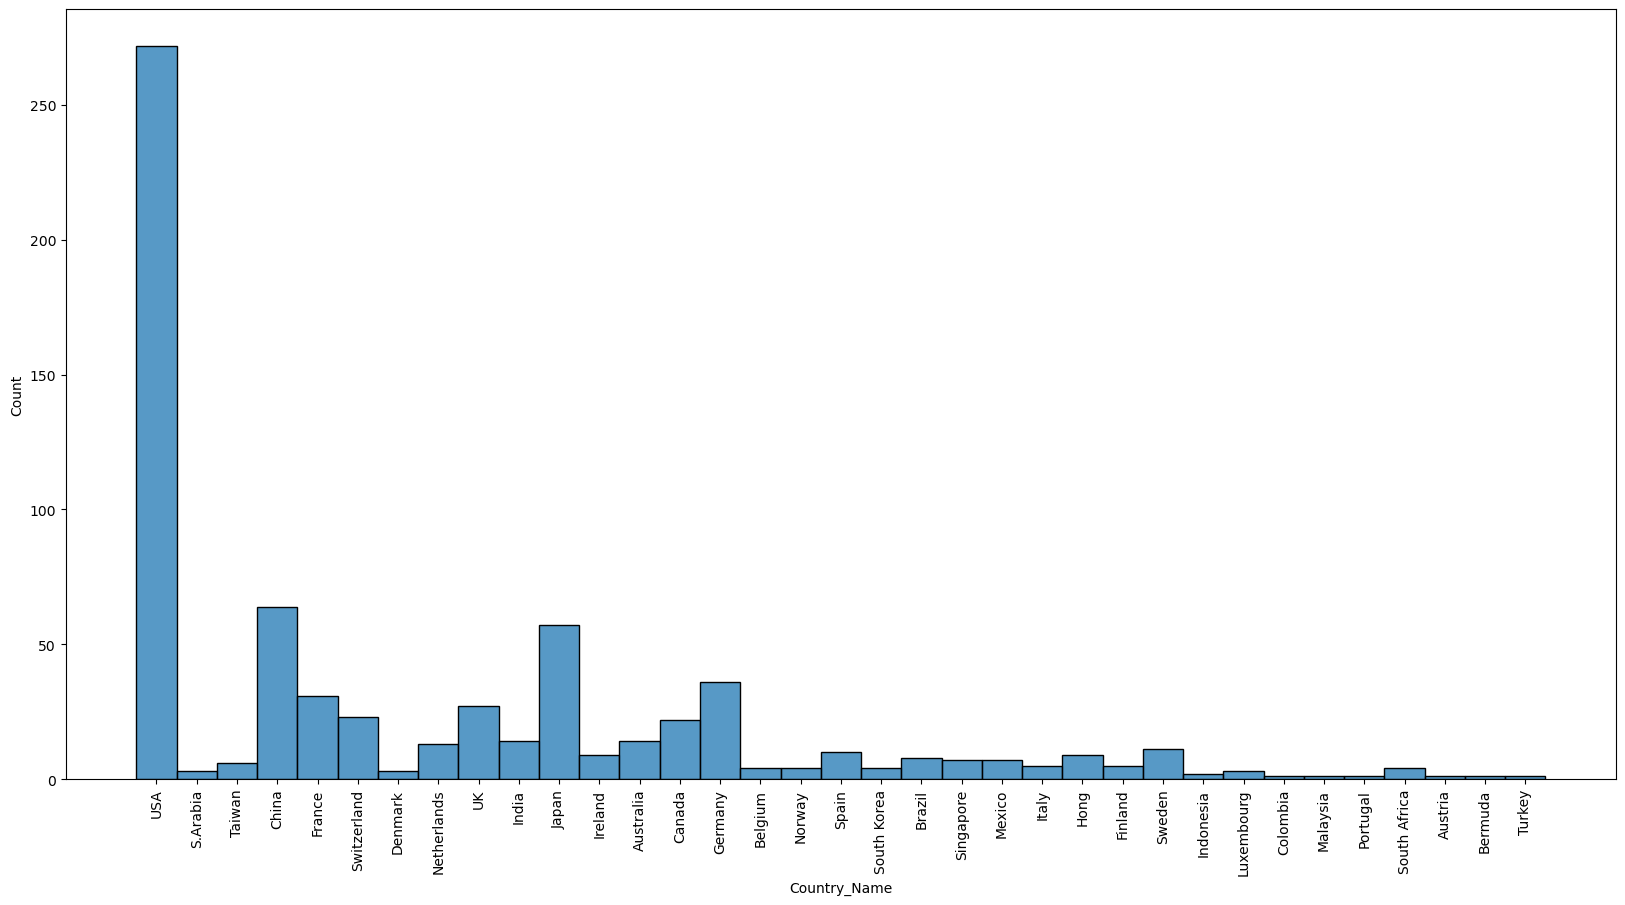

In [24]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.histplot(data=df ,x='Country_Name');

<font color=green> By Ploting the `histogram` we can see maximum country from our dataframe belongs to USA and than from China.

#### We can group the companies basis of Country:

In [25]:
country_df=df.groupby('Country_Name')

In [26]:
len(country_df)

35

In [27]:
country_df.size().sort_values(ascending=False).head(3)

Country_Name
USA      272
China     64
Japan     57
dtype: int64

### We can get the particular company from a group:

In [28]:
country_df.get_group('India')

,Overall_Rank,Company_Name,Company_Code,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Country_Name,Earnings(Billions(in dollar)),Company_Revenue(Billions(in dollar)),Employee_Counts,company_list,Category_list
42,46,Reliance Industries,RELIANCE.NS,2.034200e+11,30.07,India,12.29,108.23,236334,https://companiesmarketcap.com//reliance-indus...,Conglomerate
73,80,Tata Consultancy Services,TCS.NS,1.484100e+11,40.56,India,6.99,26.71,616171,https://companiesmarketcap.com//tata-consultan...,IT services
97,108,HDFC Bank,HDB,1.242600e+11,66.85,India,6.23,14.07,161027,https://companiesmarketcap.com//hdfc-bank/mark...,Banks
159,180,Infosys,INFY,7.820000e+10,18.47,India,4.02,17.52,345218,https://companiesmarketcap.com//infosys/market...,Professional services
164,188,ICICI Bank,IBN,7.494000e+10,21.42,India,5.29,15.84,130542,https://companiesmarketcap.com//icici-bank/mar...,Banks
235,290,Life Insurance Corporation of India (LIC),LICI.NS,5.426000e+10,8.58,India,2.38,99.32,104036,https://companiesmarketcap.com//life-insurance...,Insurance
257,323,ITC,ITC.NS,4.980000e+10,4.01,India,3.01,8.84,23829,https://companiesmarketcap.com//itc/marketcap/,Pharmaceuticals
420,649,Wipro,WIT,2.712000e+10,4.87,India,1.93,10.97,259179,https://companiesmarketcap.com//wipro/marketcap/,Tech
425,656,Bajaj Finserv,BAJAJFINSV.NS,2.689000e+10,16.88,India,3.21,9.50,59961,https://companiesmarketcap.com//bajaj-finserv/...,Banks
473,771,JSW Steel,JSWSTEEL.NS,2.237000e+10,9.29,India,1.56,20.90,13483,https://companiesmarketcap.com//jsw-steel/mark...,Steel industry


<font color=green> By `groupby` function we can analyse the different stats from different countries. So, i analyze the data from our country `India` and 14 companies are lie in our DataFrame.

#### We can find the Different statistics from different countries:

In [47]:
Market_df=country_df['Market_Cap(Trillion/Billion(in dollar))'].mean().sort_values(ascending=False)

In [52]:
Market_df

Country_Name
S.Arabia        6.749600e+11
Denmark         1.240033e+11
USA             1.038341e+11
Taiwan          9.906833e+10
Switzerland     7.091826e+10
France          7.090806e+10
China           7.014562e+10
UK              6.738407e+10
India           6.265786e+10
Ireland         5.416556e+10
Netherlands     5.302923e+10
Australia       5.204429e+10
Canada          4.625955e+10
South Korea     4.506750e+10
Italy           4.491800e+10
Belgium         4.342000e+10
Germany         4.208889e+10
Spain           4.082700e+10
Norway          3.803500e+10
Japan           3.424386e+10
Brazil          3.280500e+10
Mexico          3.209571e+10
Singapore       3.143571e+10
Finland         2.908800e+10
Indonesia       2.701500e+10
Colombia        2.421000e+10
Malaysia        2.400000e+10
Hong            2.399889e+10
Sweden          2.294636e+10
Portugal        2.050000e+10
Luxembourg      1.877667e+10
Austria         1.460000e+10
South Africa    1.347750e+10
Bermuda         1.173000e+10
T

In [30]:
df.columns

Index(['Overall_Rank', 'Company_Name', 'Company_Code',
       'Market_Cap(Trillion/Billion(in dollar))', 'Share_Price (Dollar($))',
       'Country_Name', 'Earnings(Billions(in dollar))',
       'Company_Revenue(Billions(in dollar))', 'Employee_Counts',
       'company_list', 'Category_list'],
      dtype='object')

In [31]:
df['Market_Cap(Trillion/Billion(in dollar))'].describe()

count    6.830000e+02
mean     7.521066e+10
std      1.564763e+11
min      8.270000e+09
25%      1.976500e+10
50%      3.645000e+10
75%      7.224500e+10
max      2.132000e+12
Name: Market_Cap(Trillion/Billion(in dollar)), dtype: float64

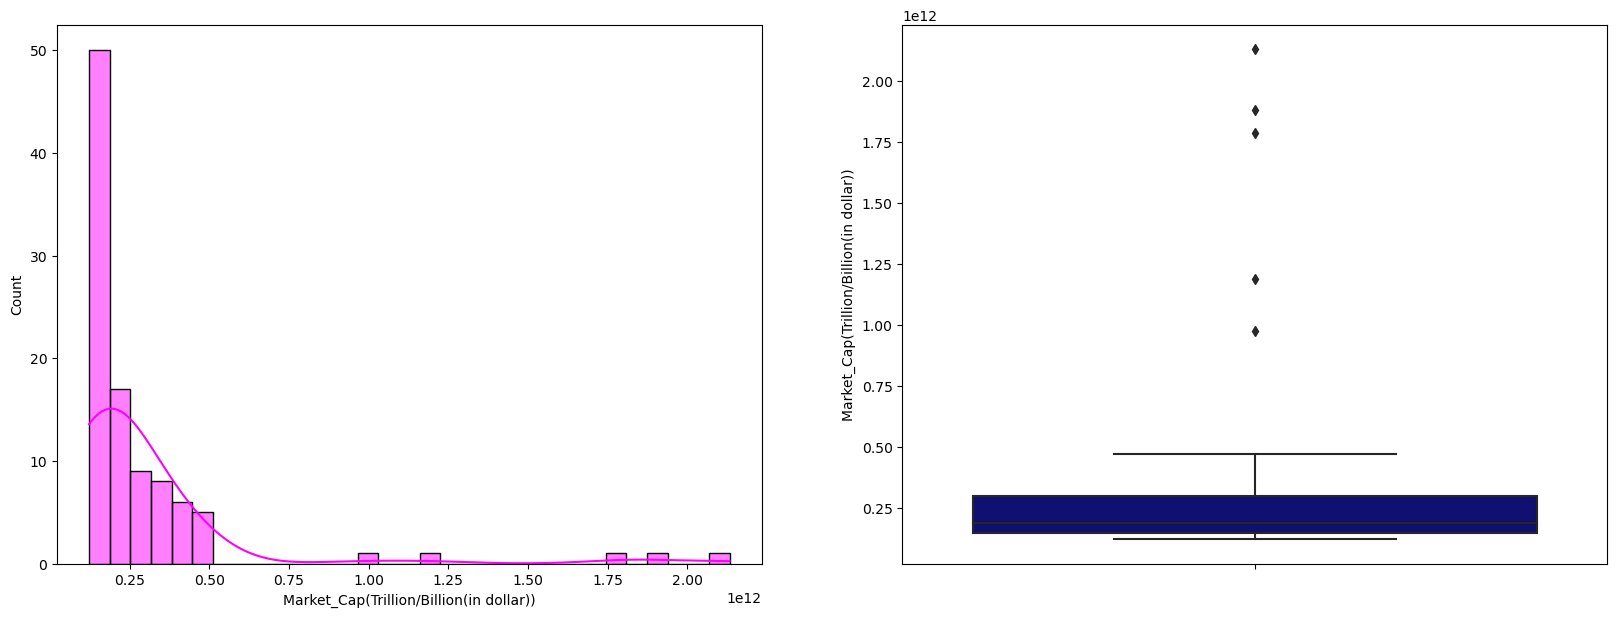

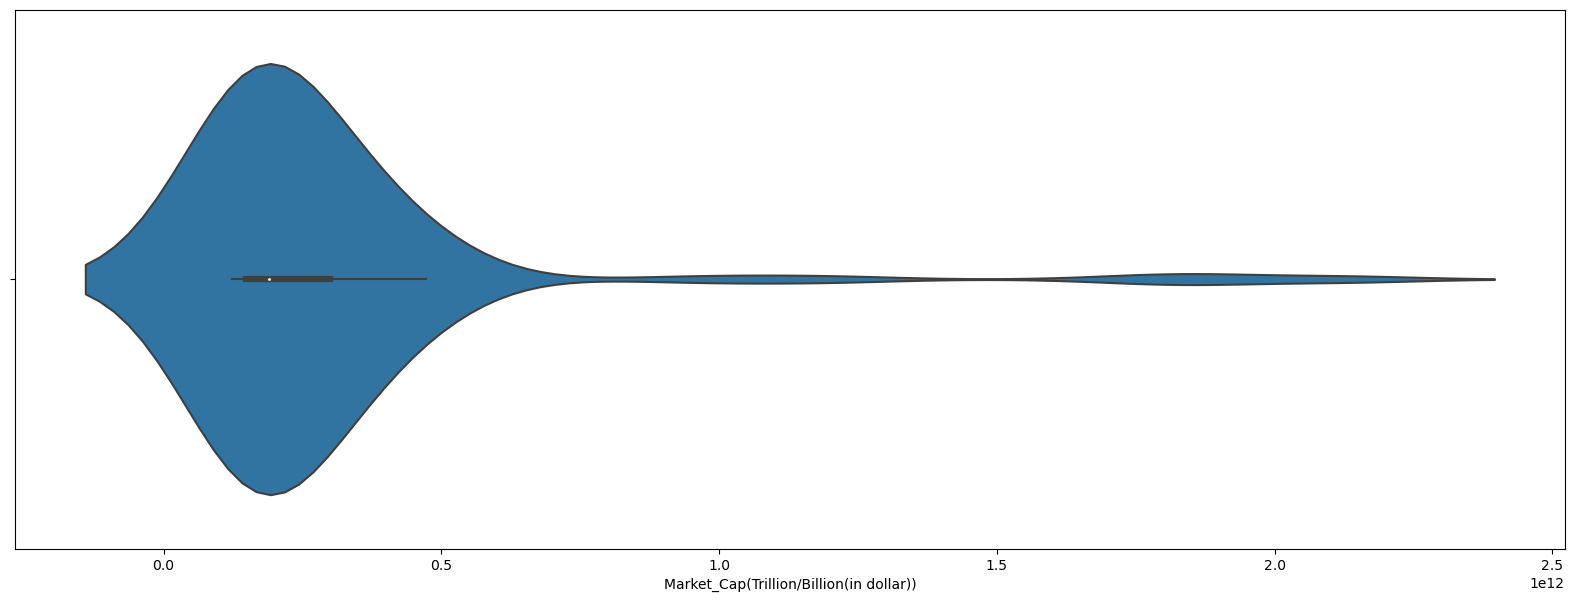

In [123]:
fig1,ax1=plt.subplots(1,2,figsize=(20,7))
fig2,ax2=plt.subplots(figsize=(20,7))


sns.histplot(data=df[:100] , x= 'Market_Cap(Trillion/Billion(in dollar))',kde=True,color='magenta',ax=ax1[0])
sns.boxplot(data=df[:100] , y= 'Market_Cap(Trillion/Billion(in dollar))',ax=ax1[1],color='navy')


sns.violinplot(data=df[:100] , x='Market_Cap(Trillion/Billion(in dollar))',ax=ax2)

plt.show()


### <font color=green> From above `Hist`,`Box` and `violin` plot we can see most of the market cap of the country are between the `7.224500e+10` range only few are in trillion dollar market cap company are their in our DataFrame.

In [167]:
df.columns

Index(['Overall_Rank', 'Company_Name', 'Company_Code',
       'Market_Cap(Trillion/Billion(in dollar))', 'Share_Price (Dollar($))',
       'Country_Name', 'Earnings(Billions(in dollar))',
       'Company_Revenue(Billions(in dollar))', 'Employee_Counts',
       'company_list', 'Category_list'],
      dtype='object')

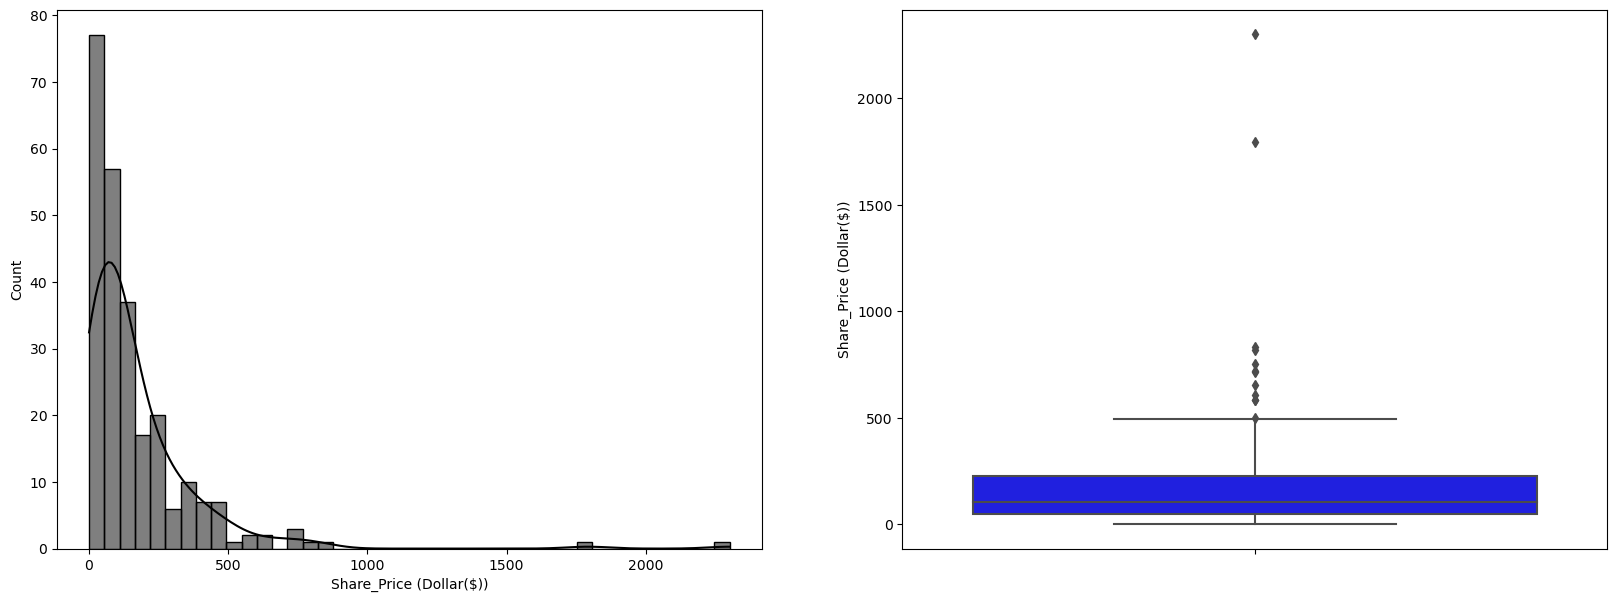

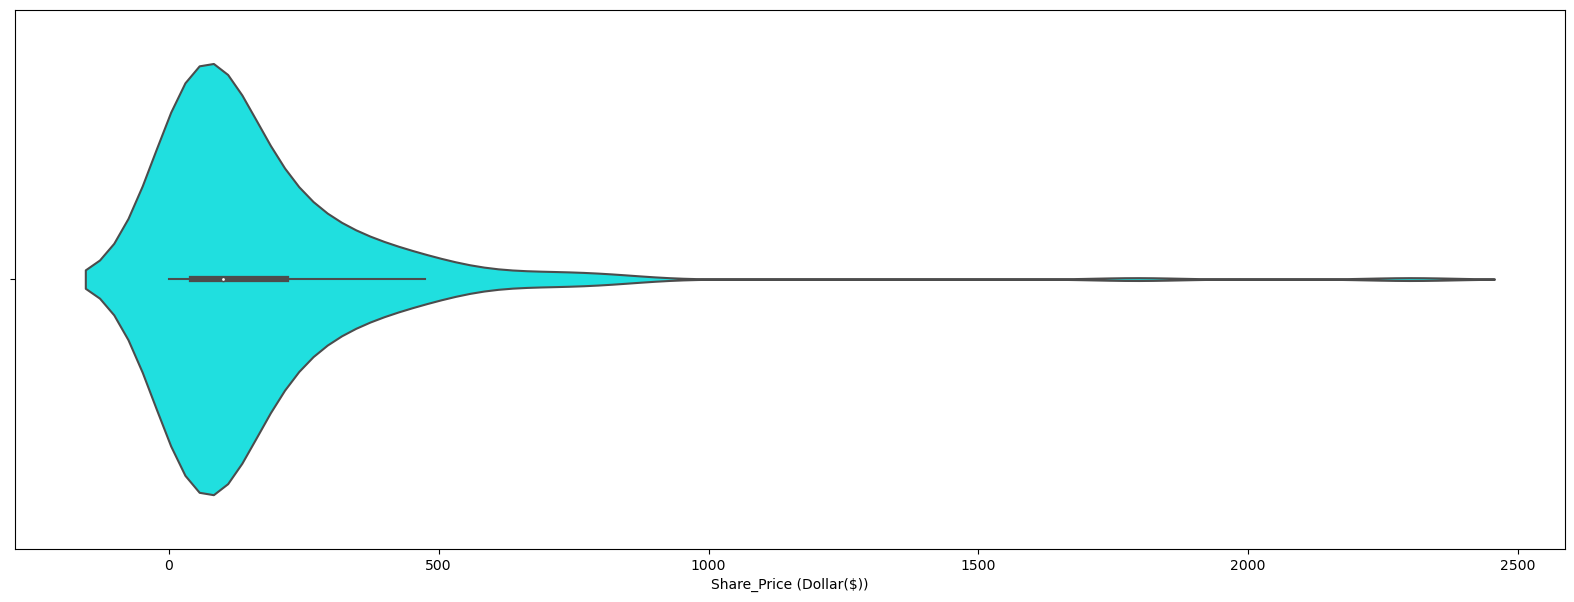

In [66]:
fig1,ax1=plt.subplots(1,2,figsize=(20,7))
fig2,ax2=plt.subplots(figsize=(20,7))


sns.histplot(data=df[:250] , x= 'Share_Price (Dollar($))',kde=True,color='k',ax=ax1[0])
sns.boxplot(data=df[:210] , y= 'Share_Price (Dollar($))',ax=ax1[1],color='blue')


sns.violinplot(data=df[:250] , x='Share_Price (Dollar($))',ax=ax2,color='aqua')

plt.show()


###<font color=green> Share_Price (Dollar($)) analysis of top 250 countries and their trends.

In [181]:
df.columns

Index(['Overall_Rank', 'Company_Name', 'Company_Code',
       'Market_Cap(Trillion/Billion(in dollar))', 'Share_Price (Dollar($))',
       'Country_Name', 'Earnings(Billions(in dollar))',
       'Company_Revenue(Billions(in dollar))', 'Employee_Counts',
       'company_list', 'Category_list'],
      dtype='object')

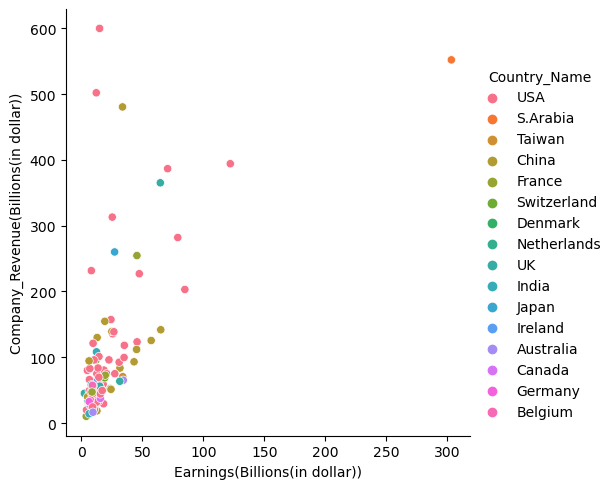

In [37]:
sns.relplot(data=df[:100],x='Earnings(Billions(in dollar))',y='Company_Revenue(Billions(in dollar))',kind='scatter',hue='Country_Name');

### <font color=green> Scatter plot shows Positive relation between `Company_Revenue` and `Earnings` i.e If one parameter increases it leads to increase the other as well.

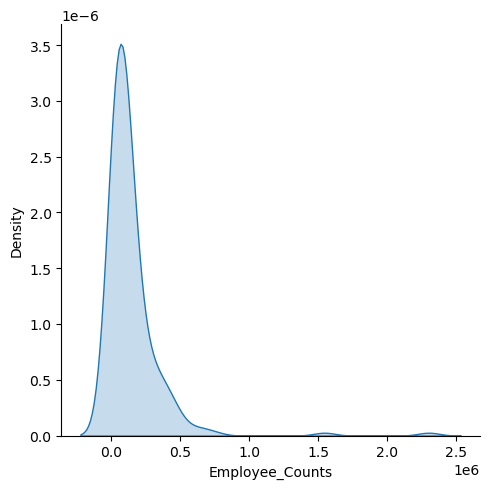

In [69]:

sns.displot(data=df[:200],x='Employee_Counts',kind='kde',fill=True);

## <font color=green> Maximum number of employee also are lie Employee_Counts `(0 to 0.7 x 10e6)`.

### PairPlot :

<font color=green>__For each `numerical and categorical` variables to each and every other `numerical and categorical` variables graphs which show the relation of how they are related to each other from the graph we can say for every graph wrt to himself shown with `bar or histogram` and with others with the `scatter plot`__

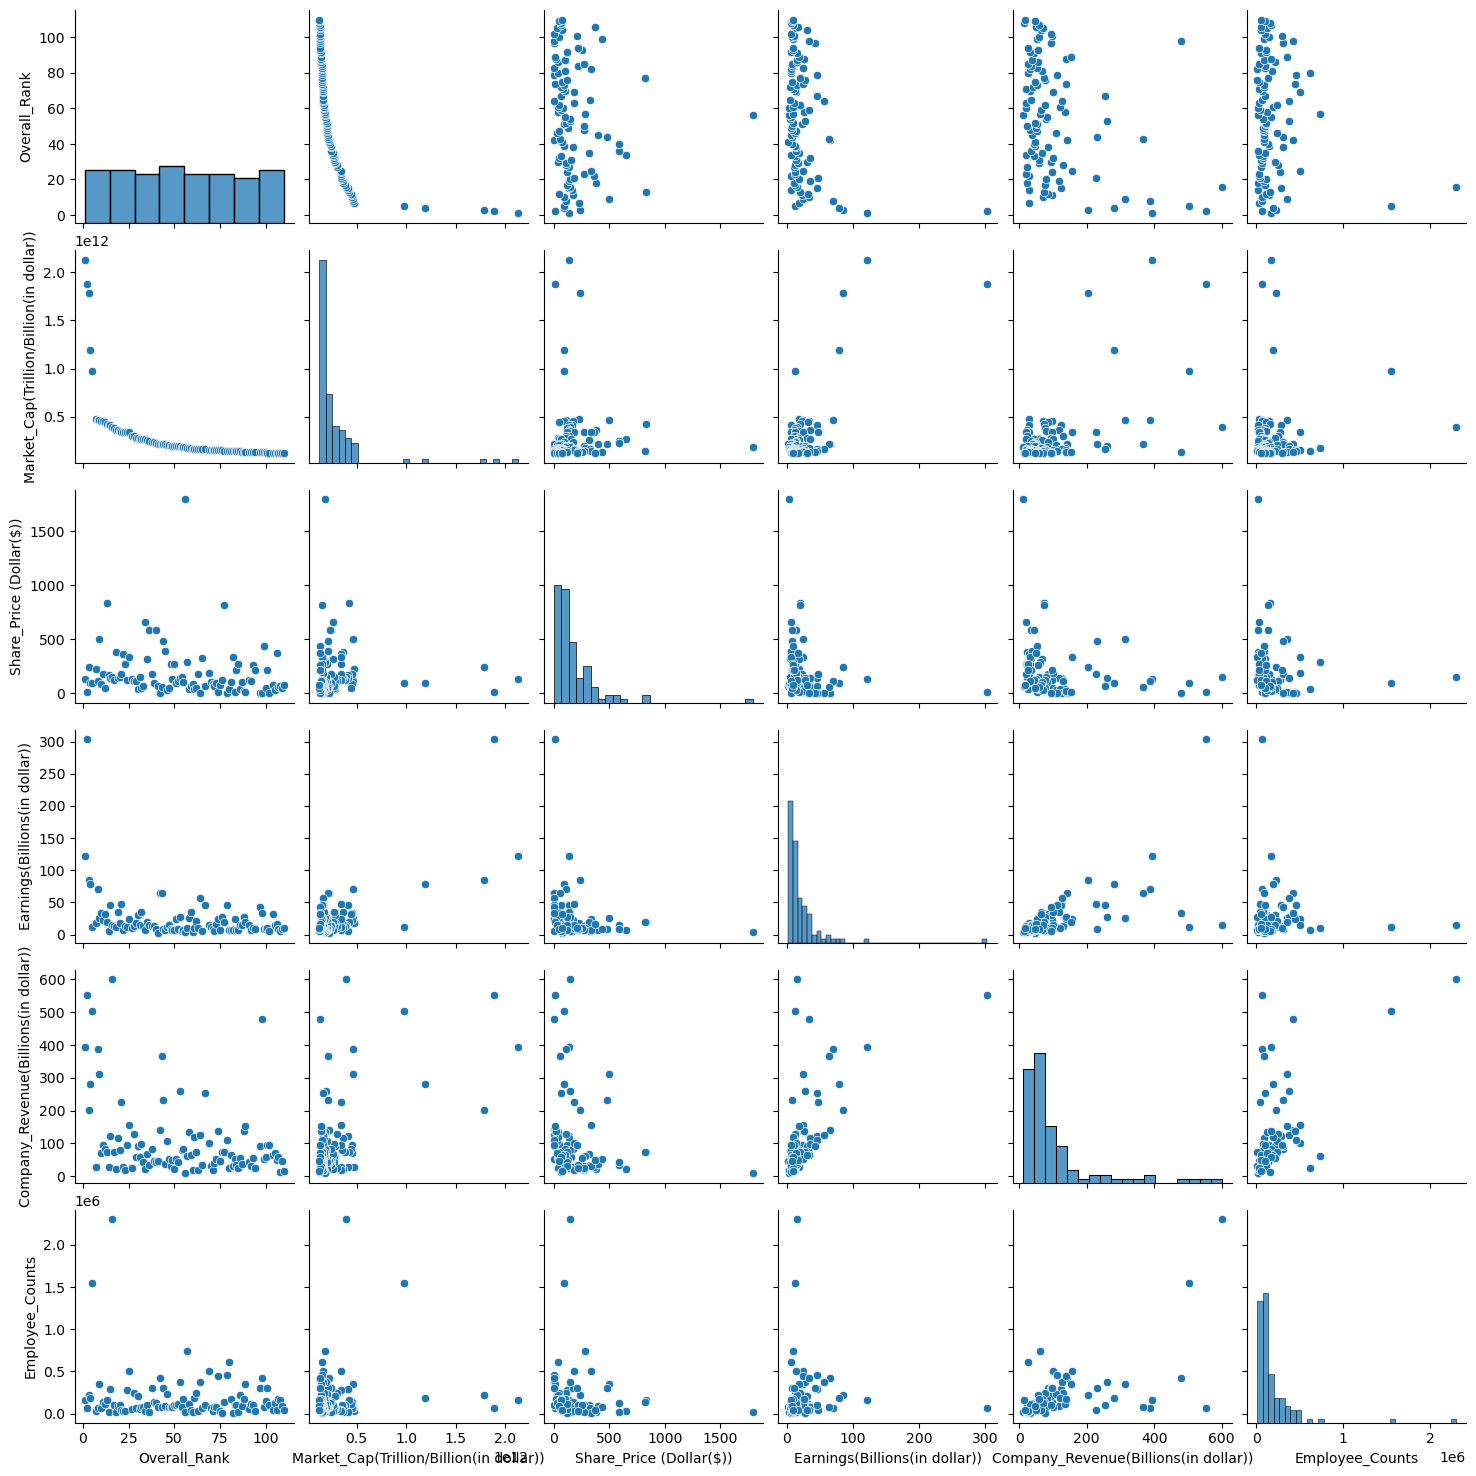

In [112]:
sns.pairplot(data=df[:100]);

### Joinplot

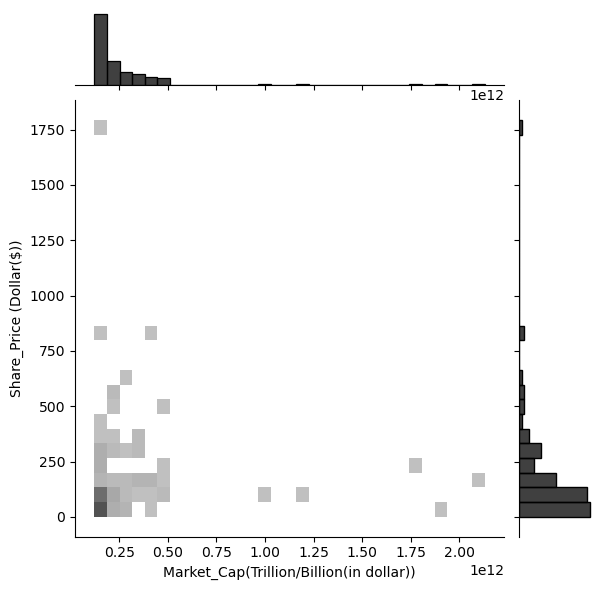

In [125]:
sns.jointplot(data=df[:100],x='Market_Cap(Trillion/Billion(in dollar))',y='Share_Price (Dollar($))',kind='hist',color='k')

### <font color=green>Higher market capital company have lower Share price values.

### Heatmap

In [204]:
df.columns

Index(['Overall_Rank', 'Company_Name', 'Company_Code',
       'Market_Cap(Trillion/Billion(in dollar))', 'Share_Price (Dollar($))',
       'Country_Name', 'Earnings(Billions(in dollar))',
       'Company_Revenue(Billions(in dollar))', 'Employee_Counts',
       'company_list', 'Category_list'],
      dtype='object')

In [40]:
corr_matrix=df.corr()

In [41]:
corr_matrix

,Overall_Rank,Market_Cap(Trillion/Billion(in dollar)),Share_Price (Dollar($)),Earnings(Billions(in dollar)),Company_Revenue(Billions(in dollar)),Employee_Counts
Overall_Rank,1.000000,-0.403743,-0.090198,-0.311634,-0.330530,-0.225619
Market_Cap(Trillion/Billion(in dollar)),-0.403743,1.000000,0.029366,0.764247,0.551286,0.250163
Share_Price (Dollar($)),-0.090198,0.029366,1.000000,-0.010841,-0.032492,-0.031911
Earnings(Billions(in dollar)),-0.311634,0.764247,-0.010841,1.000000,0.608073,0.153749
Company_Revenue(Billions(in dollar)),-0.330530,0.551286,-0.032492,0.608073,1.000000,0.602330
Employee_Counts,-0.225619,0.250163,-0.031911,0.153749,0.602330,1.000000


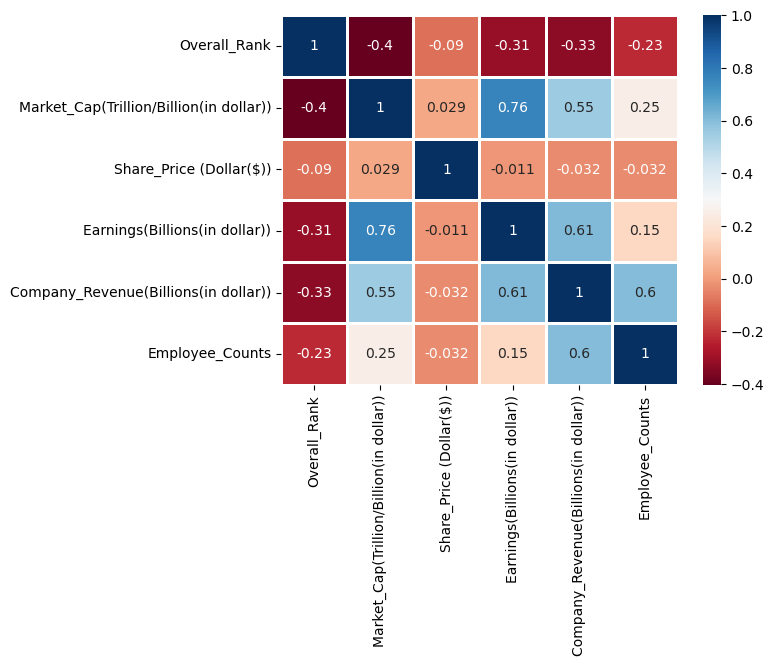

In [45]:
dataplot=sns.heatmap(data=corr_matrix,annot=True,linewidth=0.8,cmap='RdBu')
plt.show()


- <font color=green>If the value is positive or close to 1 , then we say the variables are positively correlated. And they vary in the same direction simultaneously.

      `In our Dataframe highly correlated value is(0.76) between Market_Cap(Trillion/Billion(in dollar)) and Earnings(Billions(in dollar))`	

-<font color=green> If the value is negative  then we say the variables are negatively correlated. And they vary in the opposite direction simultaneously.

      `For, negative correlation value(0.4) which is between Market_Cap(Trillion/Billion(in dollar)) wrt rank , 
      so rank doesn't depend on Market capital of the company.`
      
      
- <font color=green>If the value is 0 or close to it then we say the variables are not correlated.

## <font color=green> Inferences & Conclusion's :-

From above exploratory data analysis I have drawn many inference and here's a brief summary. *(This summary is prepared based on the data captured from website: 'https://companiesmarketcap.com/')*

- The `market capitalization` sometimes referred as Marketcap, is the value of a publicly listed company. In most cases it can be easily calculated by multiplying the share price with the amount of outstanding shares.And in our DataFrame we scrape the values of for `top companies in the world`.


- The essential difference between `revenues and earnings` is that revenues are the key indicator of the gross activity reported by a business, while earnings are the net amount left after expenses are subtracted from revenue.Our Dataset help us to see the company earning and revenue genrated in recent quater.


- Some other parameters also we scrape `Rank of the company` based on their market cap in the world , what their current share price , and if any one intrested in buying the share they have lot to compare with `No. of employee , revenue they genrated in recent quater and where they stand in the world`.


- And more important we able to scrape the `link` which is directed to the `company performance` sheet, any one can land there and do the `research more about the company` itself and draw a better conclusion one the `company health` in the ongoing timeframe.

## <font color=green> References


[1] Python offical documentation. https://docs.python.org/3/


[2] Requests library. https://pypi.org/project/requests/


[3] Beautiful Soup documentation. https://www.crummy.com/software/BeautifulSoup/bs4/doc/


[4] Pandas library documentation. https://pandas.pydata.org/docs/


[5] Web Scraping Article. https://www.toptal.com/python/web-scraping-with-python
 

[6] Working with Jupyter Notebook https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd

## 📜 <font color=green>Summary 


Yes, using numerous data analysis and visualisation techniques we have analysed our dataset and come up with inferences. There is still room for improvement and advanced visulisations that with which even more minute insights can be pulled out of our dataset. I will continue working and updating this note book as and when I find some time. Yes thanks for spending your valuable time on reading this notebook!